In [623]:
# !python -m pip uninstall scikit-learn --yes

In [624]:
# pip install scikit-learn==1.2.2 --user

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [626]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [627]:
# import sklearn
# print(sklearn.__version__)

In [628]:
from imblearn.over_sampling import SMOTENC
from sklearn.utils import resample

In [629]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [630]:
# file_path = './data/data_iu_proccessed_p3.csv'
# file_path = './data/data_iu_proccessed_p3_v2.csv'

file_path_test = './data/data_iu_proccessed_p3_20231.csv'

# Read the CSV file with specified data types
df = pd.read_csv(file_path)
df_20231 = pd.read_csv(file_path_test)

In [631]:
df.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,90.0,4,0,0,0,...,0,0,0,0,0,0,0,3,Nguyen Van Phuong,unassigned
1,1,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,36.0,4,0,0,0,...,0,0,0,0,0,0,0,1,multi,unassigned
2,2,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,46.0,2,0,0,0,...,5,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned
3,3,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,99.0,4,0,0,0,...,1,0,0,0,0,0,0,1,Nguyen Van Phuong,unassigned
4,4,Kinh tế hành vi và chính sách công,PM5110,BA BA,2.0,21.0,2,0,0,0,...,1,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned


In [632]:
df_20231.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Forecasting Techniques,ISE058IU,IEMIEM,3,15,4,0,0,13,...,0,0,0,0,0,0,0,1,Tran Duc Vi,unassigned
1,1,AI for Healthcare,BM096IU,BM BME,3,55,3,0,0,1,...,0,0,0,0,0,0,0,1,Ngo Thi Lua,unassigned
2,2,Academic English,BT310UN,BT BT,3,40,4,0,0,0,...,1,0,0,0,0,0,0,1,Nguyen Van Toan,unassigned
3,3,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,7,0,0,0,0,0,0,1,Nguyen The Man,unassigned
4,4,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,0,0,0,0,0,0,0,1,Alang Tho,unassigned


In [633]:
# Remove the specified columns
columns_to_remove = ['Unnamed: 0', 'TenMH']  # Columns to be removed
df.drop(columns=columns_to_remove, inplace=True)
df.dtypes

df_20231.drop(columns=columns_to_remove, inplace=True)

In [634]:
df.shape

(21636, 20)

In [635]:
#-----------4 Classes--------------
# #Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class3', 4: 'Class4'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------2 Classes (Over90)--------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class1', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (TR89-Spread)-------------
# Create a dictionary to map values
class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class1', 4: 'Class2'}

# Map the values in the 'ClassifyAs' column
df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (High vs Low priority course)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------------------------------------------------------------

In [636]:
df_20231['ClassifyAs'] = df_20231['ClassifyAs'].map(class_mapping)

In [637]:
# Count the occurrences of each class
class_counts = df['ClassifyAs'].value_counts()

# Print the counts
print(class_counts)

ClassifyAs
Class2    19825
Class1     1811
Name: count, dtype: int64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6392239	test: 0.6333757	best: 0.6333757 (0)	total: 32ms	remaining: 32s
10:	learn: 0.7124303	test: 0.7409541	best: 0.7409541 (10)	total: 302ms	remaining: 27.2s
20:	learn: 0.7320247	test: 0.7540745	best: 0.7540745 (20)	total: 604ms	remaining: 28.2s
30:	learn: 0.7511124	test: 0.7746741	best: 0.7746741 (30)	total: 878ms	remaining: 27.5s
40:	learn: 0.7601509	test: 0.7817134	best: 0.7817134 (40)	total: 1.25s	remaining: 29.3s
50:	learn: 0.7657690	test: 0.7865195	best: 0.7876623 (48)	total: 1.57s	remaining: 29.2s
60:	learn: 0.7743343	test: 0.7869354	best: 0.7879221 (52)	total: 1.88s	remaining: 28.9s
70:	learn: 0.7813346	test: 0.7921049	best: 0.7943906 (64)	total: 2.15s	remaining: 28.2s
80:	learn: 0.7878045	test: 0.7949626	best: 0.7950925 (79)	total: 2.41s	remaining: 27.4s
90:	learn: 0.7915792	test: 0.7974306	best: 0.7979502 (88)	total: 2.68s	remaining: 26.8s
100:	learn: 0.7982446	test: 0.7989893	best: 0.8008853 (95)	total: 2.94s	remaining: 26.2s
110:	learn: 0.7996459	test: 0.796729

920:	learn: 0.9007547	test: 0.7850999	best: 0.8065744 (121)	total: 27.2s	remaining: 2.33s
930:	learn: 0.9011714	test: 0.7837235	best: 0.8065744 (121)	total: 27.5s	remaining: 2.04s
940:	learn: 0.9013924	test: 0.7813079	best: 0.8065744 (121)	total: 27.8s	remaining: 1.74s
950:	learn: 0.9010579	test: 0.7771000	best: 0.8065744 (121)	total: 28.1s	remaining: 1.45s
960:	learn: 0.9017775	test: 0.7797754	best: 0.8065744 (121)	total: 28.3s	remaining: 1.15s
970:	learn: 0.9021563	test: 0.7781130	best: 0.8065744 (121)	total: 28.6s	remaining: 854ms
980:	learn: 0.9019417	test: 0.7787624	best: 0.8065744 (121)	total: 28.9s	remaining: 560ms
990:	learn: 0.9021311	test: 0.7760871	best: 0.8065744 (121)	total: 29.2s	remaining: 265ms
999:	learn: 0.9038164	test: 0.7778794	best: 0.8065744 (121)	total: 29.4s	remaining: 0us

bestTest = 0.8065744198
bestIteration = 121

Shrink model to first 122 iterations.


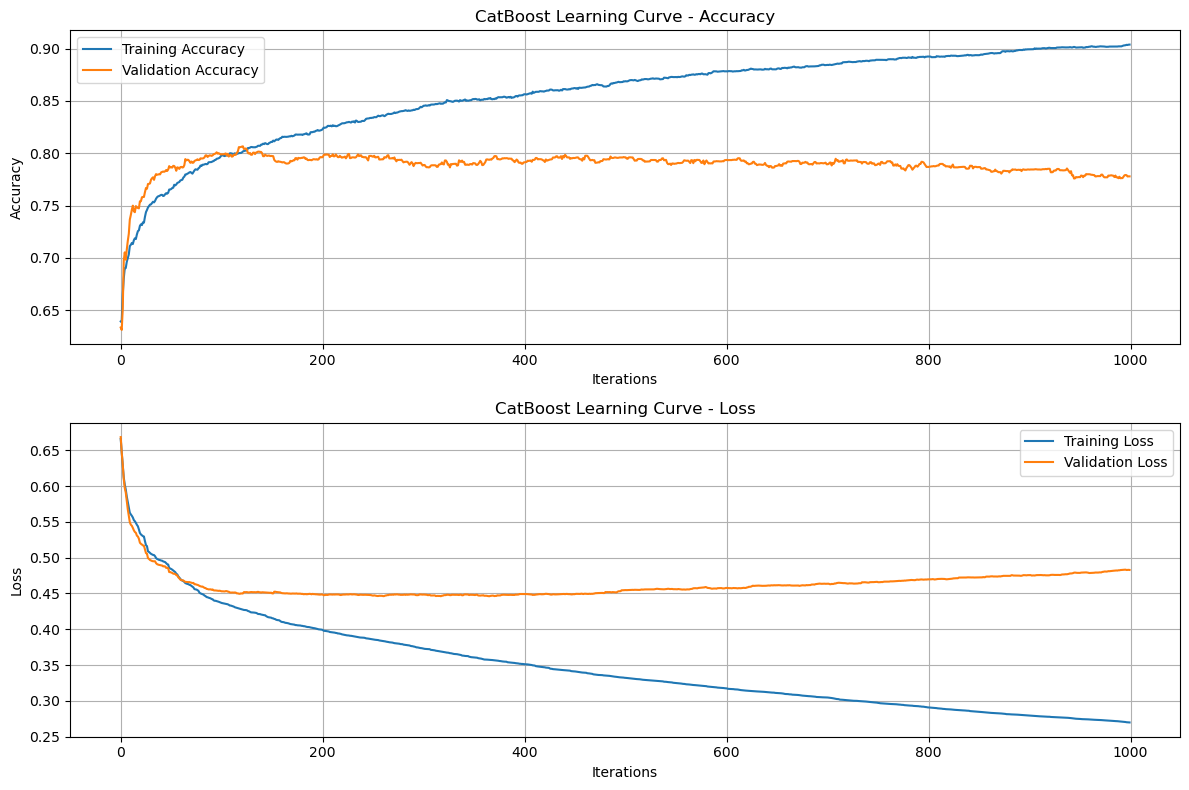

Model Accuracy: 0.7781885397412199
0:	learn: 0.6395933	total: 22.7ms	remaining: 22.6s
1:	learn: 0.6460308	total: 45.8ms	remaining: 22.9s
2:	learn: 0.6571271	total: 66.3ms	remaining: 22s
3:	learn: 0.6877614	total: 89.3ms	remaining: 22.2s
4:	learn: 0.6839177	total: 115ms	remaining: 22.8s
5:	learn: 0.6815254	total: 140ms	remaining: 23.2s
6:	learn: 0.6859549	total: 175ms	remaining: 24.8s
7:	learn: 0.6854025	total: 198ms	remaining: 24.6s
8:	learn: 0.6849802	total: 223ms	remaining: 24.6s
9:	learn: 0.6872176	total: 247ms	remaining: 24.5s
10:	learn: 0.6882887	total: 271ms	remaining: 24.4s
11:	learn: 0.6924039	total: 296ms	remaining: 24.3s
12:	learn: 0.6967282	total: 322ms	remaining: 24.4s
13:	learn: 0.6996685	total: 350ms	remaining: 24.7s
14:	learn: 0.7023399	total: 377ms	remaining: 24.8s
15:	learn: 0.7052027	total: 401ms	remaining: 24.7s
16:	learn: 0.7048666	total: 425ms	remaining: 24.6s
17:	learn: 0.7058340	total: 449ms	remaining: 24.5s
18:	learn: 0.7068248	total: 473ms	remaining: 24.4s
19:	

167:	learn: 0.8173464	total: 4.42s	remaining: 21.9s
168:	learn: 0.8187698	total: 4.44s	remaining: 21.8s
169:	learn: 0.8188750	total: 4.46s	remaining: 21.8s
170:	learn: 0.8189525	total: 4.49s	remaining: 21.8s
171:	learn: 0.8200252	total: 4.52s	remaining: 21.7s
172:	learn: 0.8205790	total: 4.54s	remaining: 21.7s
173:	learn: 0.8203057	total: 4.57s	remaining: 21.7s
174:	learn: 0.8215888	total: 4.59s	remaining: 21.6s
175:	learn: 0.8216941	total: 4.62s	remaining: 21.6s
176:	learn: 0.8221149	total: 4.65s	remaining: 21.6s
177:	learn: 0.8220945	total: 4.68s	remaining: 21.6s
178:	learn: 0.8234053	total: 4.7s	remaining: 21.6s
179:	learn: 0.8228515	total: 4.73s	remaining: 21.5s
180:	learn: 0.8236508	total: 4.75s	remaining: 21.5s
181:	learn: 0.8237210	total: 4.78s	remaining: 21.5s
182:	learn: 0.8232022	total: 4.81s	remaining: 21.5s
183:	learn: 0.8235807	total: 4.84s	remaining: 21.5s
184:	learn: 0.8235105	total: 4.86s	remaining: 21.4s
185:	learn: 0.8239592	total: 4.89s	remaining: 21.4s
186:	learn: 0

327:	learn: 0.8489781	total: 8.67s	remaining: 17.8s
328:	learn: 0.8489781	total: 8.69s	remaining: 17.7s
329:	learn: 0.8491184	total: 8.72s	remaining: 17.7s
330:	learn: 0.8492937	total: 8.75s	remaining: 17.7s
331:	learn: 0.8499104	total: 8.78s	remaining: 17.7s
332:	learn: 0.8511585	total: 8.81s	remaining: 17.7s
333:	learn: 0.8501282	total: 8.84s	remaining: 17.6s
334:	learn: 0.8497497	total: 8.87s	remaining: 17.6s
335:	learn: 0.8501633	total: 8.9s	remaining: 17.6s
336:	learn: 0.8499601	total: 8.94s	remaining: 17.6s
337:	learn: 0.8499601	total: 8.97s	remaining: 17.6s
338:	learn: 0.8502056	total: 9s	remaining: 17.6s
339:	learn: 0.8497921	total: 9.03s	remaining: 17.5s
340:	learn: 0.8503459	total: 9.06s	remaining: 17.5s
341:	learn: 0.8496941	total: 9.09s	remaining: 17.5s
342:	learn: 0.8496941	total: 9.12s	remaining: 17.5s
343:	learn: 0.8500726	total: 9.16s	remaining: 17.5s
344:	learn: 0.8513134	total: 9.19s	remaining: 17.4s
345:	learn: 0.8513134	total: 9.22s	remaining: 17.4s
346:	learn: 0.85

491:	learn: 0.8717113	total: 13.4s	remaining: 13.8s
492:	learn: 0.8721249	total: 13.4s	remaining: 13.8s
493:	learn: 0.8722652	total: 13.4s	remaining: 13.7s
494:	learn: 0.8719569	total: 13.4s	remaining: 13.7s
495:	learn: 0.8726159	total: 13.5s	remaining: 13.7s
496:	learn: 0.8727212	total: 13.5s	remaining: 13.7s
497:	learn: 0.8732400	total: 13.5s	remaining: 13.6s
498:	learn: 0.8737310	total: 13.5s	remaining: 13.6s
499:	learn: 0.8739692	total: 13.6s	remaining: 13.6s
500:	learn: 0.8747262	total: 13.6s	remaining: 13.5s
501:	learn: 0.8756586	total: 13.6s	remaining: 13.5s
502:	learn: 0.8744456	total: 13.6s	remaining: 13.5s
503:	learn: 0.8755811	total: 13.7s	remaining: 13.5s
504:	learn: 0.8756863	total: 13.7s	remaining: 13.4s
505:	learn: 0.8756863	total: 13.7s	remaining: 13.4s
506:	learn: 0.8748314	total: 13.8s	remaining: 13.4s
507:	learn: 0.8747963	total: 13.8s	remaining: 13.3s
508:	learn: 0.8747262	total: 13.8s	remaining: 13.3s
509:	learn: 0.8746210	total: 13.8s	remaining: 13.3s
510:	learn: 

656:	learn: 0.8889674	total: 17.9s	remaining: 9.32s
657:	learn: 0.8891077	total: 17.9s	remaining: 9.29s
658:	learn: 0.8891427	total: 17.9s	remaining: 9.27s
659:	learn: 0.8891778	total: 17.9s	remaining: 9.24s
660:	learn: 0.8891778	total: 18s	remaining: 9.21s
661:	learn: 0.8889396	total: 18s	remaining: 9.18s
662:	learn: 0.8885260	total: 18s	remaining: 9.15s
663:	learn: 0.8887365	total: 18s	remaining: 9.13s
664:	learn: 0.8886663	total: 18.1s	remaining: 9.1s
665:	learn: 0.8887365	total: 18.1s	remaining: 9.07s
666:	learn: 0.8889396	total: 18.1s	remaining: 9.05s
667:	learn: 0.8888344	total: 18.1s	remaining: 9.02s
668:	learn: 0.8887292	total: 18.2s	remaining: 8.99s
669:	learn: 0.8894862	total: 18.2s	remaining: 8.96s
670:	learn: 0.8895563	total: 18.2s	remaining: 8.94s
671:	learn: 0.8890799	total: 18.3s	remaining: 8.91s
672:	learn: 0.8889396	total: 18.3s	remaining: 8.88s
673:	learn: 0.8891500	total: 18.3s	remaining: 8.85s
674:	learn: 0.8894306	total: 18.3s	remaining: 8.83s
675:	learn: 0.8890521

818:	learn: 0.9017077	total: 22.4s	remaining: 4.94s
819:	learn: 0.9008806	total: 22.4s	remaining: 4.91s
820:	learn: 0.9010209	total: 22.4s	remaining: 4.89s
821:	learn: 0.9014271	total: 22.4s	remaining: 4.86s
822:	learn: 0.9013219	total: 22.5s	remaining: 4.83s
823:	learn: 0.9016376	total: 22.5s	remaining: 4.8s
824:	learn: 0.9017779	total: 22.5s	remaining: 4.78s
825:	learn: 0.9020161	total: 22.5s	remaining: 4.75s
826:	learn: 0.9020862	total: 22.6s	remaining: 4.72s
827:	learn: 0.9018129	total: 22.6s	remaining: 4.69s
828:	learn: 0.9016098	total: 22.6s	remaining: 4.67s
829:	learn: 0.9016098	total: 22.7s	remaining: 4.64s
830:	learn: 0.9014695	total: 22.7s	remaining: 4.61s
831:	learn: 0.9016449	total: 22.7s	remaining: 4.58s
832:	learn: 0.9016449	total: 22.7s	remaining: 4.56s
833:	learn: 0.9013716	total: 22.8s	remaining: 4.53s
834:	learn: 0.9023040	total: 22.8s	remaining: 4.5s
835:	learn: 0.9023040	total: 22.8s	remaining: 4.47s
836:	learn: 0.9021637	total: 22.8s	remaining: 4.45s
837:	learn: 0.

977:	learn: 0.9092119	total: 27s	remaining: 607ms
978:	learn: 0.9096956	total: 27s	remaining: 580ms
979:	learn: 0.9098008	total: 27.1s	remaining: 552ms
980:	learn: 0.9093522	total: 27.1s	remaining: 525ms
981:	learn: 0.9093522	total: 27.1s	remaining: 497ms
982:	learn: 0.9097307	total: 27.1s	remaining: 470ms
983:	learn: 0.9097658	total: 27.2s	remaining: 442ms
984:	learn: 0.9098359	total: 27.2s	remaining: 414ms
985:	learn: 0.9100463	total: 27.2s	remaining: 387ms
986:	learn: 0.9101516	total: 27.3s	remaining: 359ms
987:	learn: 0.9101866	total: 27.3s	remaining: 332ms
988:	learn: 0.9103971	total: 27.3s	remaining: 304ms
989:	learn: 0.9102568	total: 27.4s	remaining: 276ms
990:	learn: 0.9103620	total: 27.4s	remaining: 249ms
991:	learn: 0.9099134	total: 27.4s	remaining: 221ms
992:	learn: 0.9098432	total: 27.5s	remaining: 194ms
993:	learn: 0.9098783	total: 27.5s	remaining: 166ms
994:	learn: 0.9098432	total: 27.5s	remaining: 138ms
995:	learn: 0.9098432	total: 27.5s	remaining: 111ms
996:	learn: 0.90

141:	learn: 0.8088260	total: 4.13s	remaining: 24.9s
142:	learn: 0.8093170	total: 4.15s	remaining: 24.9s
143:	learn: 0.8091767	total: 4.18s	remaining: 24.8s
144:	learn: 0.8099623	total: 4.21s	remaining: 24.8s
145:	learn: 0.8103762	total: 4.23s	remaining: 24.8s
146:	learn: 0.8115265	total: 4.26s	remaining: 24.8s
147:	learn: 0.8116248	total: 4.29s	remaining: 24.7s
148:	learn: 0.8133503	total: 4.33s	remaining: 24.7s
149:	learn: 0.8130347	total: 4.36s	remaining: 24.7s
150:	learn: 0.8135187	total: 4.39s	remaining: 24.7s
151:	learn: 0.8133784	total: 4.42s	remaining: 24.7s
152:	learn: 0.8139325	total: 4.44s	remaining: 24.6s
153:	learn: 0.8148515	total: 4.47s	remaining: 24.6s
154:	learn: 0.8156862	total: 4.5s	remaining: 24.5s
155:	learn: 0.8168296	total: 4.52s	remaining: 24.5s
156:	learn: 0.8168786	total: 4.55s	remaining: 24.4s
157:	learn: 0.8168435	total: 4.57s	remaining: 24.4s
158:	learn: 0.8168085	total: 4.6s	remaining: 24.3s
159:	learn: 0.8172574	total: 4.63s	remaining: 24.3s
160:	learn: 0.

302:	learn: 0.8448867	total: 8.59s	remaining: 19.7s
303:	learn: 0.8448867	total: 8.61s	remaining: 19.7s
304:	learn: 0.8450270	total: 8.64s	remaining: 19.7s
305:	learn: 0.8451673	total: 8.66s	remaining: 19.7s
306:	learn: 0.8459249	total: 8.69s	remaining: 19.6s
307:	learn: 0.8466544	total: 8.72s	remaining: 19.6s
308:	learn: 0.8483098	total: 8.75s	remaining: 19.6s
309:	learn: 0.8479310	total: 8.78s	remaining: 19.5s
310:	learn: 0.8479310	total: 8.81s	remaining: 19.5s
311:	learn: 0.8480012	total: 8.83s	remaining: 19.5s
312:	learn: 0.8487237	total: 8.86s	remaining: 19.4s
313:	learn: 0.8491025	total: 8.88s	remaining: 19.4s
314:	learn: 0.8484150	total: 8.91s	remaining: 19.4s
315:	learn: 0.8491025	total: 8.93s	remaining: 19.3s
316:	learn: 0.8493480	total: 8.96s	remaining: 19.3s
317:	learn: 0.8493830	total: 8.98s	remaining: 19.3s
318:	learn: 0.8502458	total: 9.01s	remaining: 19.2s
319:	learn: 0.8499722	total: 9.04s	remaining: 19.2s
320:	learn: 0.8500143	total: 9.06s	remaining: 19.2s
321:	learn: 

467:	learn: 0.8691704	total: 13.4s	remaining: 15.3s
468:	learn: 0.8691704	total: 13.5s	remaining: 15.2s
469:	learn: 0.8690652	total: 13.5s	remaining: 15.2s
470:	learn: 0.8691704	total: 13.5s	remaining: 15.2s
471:	learn: 0.8701384	total: 13.5s	remaining: 15.2s
472:	learn: 0.8694861	total: 13.6s	remaining: 15.1s
473:	learn: 0.8685882	total: 13.6s	remaining: 15.1s
474:	learn: 0.8698649	total: 13.6s	remaining: 15.1s
475:	learn: 0.8698999	total: 13.7s	remaining: 15.1s
476:	learn: 0.8702506	total: 13.7s	remaining: 15s
477:	learn: 0.8703208	total: 13.7s	remaining: 15s
478:	learn: 0.8712888	total: 13.8s	remaining: 15s
479:	learn: 0.8711134	total: 13.8s	remaining: 14.9s
480:	learn: 0.8717026	total: 13.8s	remaining: 14.9s
481:	learn: 0.8716325	total: 13.9s	remaining: 14.9s
482:	learn: 0.8713589	total: 13.9s	remaining: 14.9s
483:	learn: 0.8709801	total: 13.9s	remaining: 14.8s
484:	learn: 0.8715343	total: 13.9s	remaining: 14.8s
485:	learn: 0.8715693	total: 14s	remaining: 14.8s
486:	learn: 0.871674

628:	learn: 0.8845879	total: 18s	remaining: 10.6s
629:	learn: 0.8845177	total: 18.1s	remaining: 10.6s
630:	learn: 0.8838654	total: 18.1s	remaining: 10.6s
631:	learn: 0.8839987	total: 18.1s	remaining: 10.5s
632:	learn: 0.8841039	total: 18.1s	remaining: 10.5s
633:	learn: 0.8841039	total: 18.2s	remaining: 10.5s
634:	learn: 0.8841039	total: 18.2s	remaining: 10.5s
635:	learn: 0.8846229	total: 18.2s	remaining: 10.4s
636:	learn: 0.8845879	total: 18.2s	remaining: 10.4s
637:	learn: 0.8851420	total: 18.3s	remaining: 10.4s
638:	learn: 0.8848334	total: 18.3s	remaining: 10.3s
639:	learn: 0.8847632	total: 18.3s	remaining: 10.3s
640:	learn: 0.8851069	total: 18.4s	remaining: 10.3s
641:	learn: 0.8850719	total: 18.4s	remaining: 10.2s
642:	learn: 0.8855909	total: 18.4s	remaining: 10.2s
643:	learn: 0.8851771	total: 18.4s	remaining: 10.2s
644:	learn: 0.8854927	total: 18.5s	remaining: 10.2s
645:	learn: 0.8851139	total: 18.5s	remaining: 10.1s
646:	learn: 0.8854576	total: 18.5s	remaining: 10.1s
647:	learn: 0.

794:	learn: 0.9001107	total: 22.4s	remaining: 5.78s
795:	learn: 0.8999423	total: 22.5s	remaining: 5.77s
796:	learn: 0.8999774	total: 22.6s	remaining: 5.75s
797:	learn: 0.8999072	total: 22.6s	remaining: 5.72s
798:	learn: 0.8998722	total: 22.6s	remaining: 5.69s
799:	learn: 0.8999774	total: 22.6s	remaining: 5.66s
800:	learn: 0.8994232	total: 22.7s	remaining: 5.63s
801:	learn: 0.8998722	total: 22.7s	remaining: 5.6s
802:	learn: 0.8995635	total: 22.7s	remaining: 5.57s
803:	learn: 0.8996687	total: 22.7s	remaining: 5.54s
804:	learn: 0.9000475	total: 22.8s	remaining: 5.51s
805:	learn: 0.9006999	total: 22.8s	remaining: 5.49s
806:	learn: 0.9010787	total: 22.8s	remaining: 5.46s
807:	learn: 0.9013943	total: 22.8s	remaining: 5.43s
808:	learn: 0.9018432	total: 22.9s	remaining: 5.4s
809:	learn: 0.9009874	total: 22.9s	remaining: 5.37s
810:	learn: 0.9014363	total: 22.9s	remaining: 5.34s
811:	learn: 0.9015416	total: 22.9s	remaining: 5.31s
812:	learn: 0.9016468	total: 23s	remaining: 5.28s
813:	learn: 0.90

956:	learn: 0.9105830	total: 26.9s	remaining: 1.21s
957:	learn: 0.9107233	total: 26.9s	remaining: 1.18s
958:	learn: 0.9103094	total: 26.9s	remaining: 1.15s
959:	learn: 0.9102393	total: 26.9s	remaining: 1.12s
960:	learn: 0.9107934	total: 27s	remaining: 1.09s
961:	learn: 0.9107934	total: 27s	remaining: 1.07s
962:	learn: 0.9103796	total: 27s	remaining: 1.04s
963:	learn: 0.9106882	total: 27.1s	remaining: 1.01s
964:	learn: 0.9107233	total: 27.1s	remaining: 982ms
965:	learn: 0.9106181	total: 27.1s	remaining: 954ms
966:	learn: 0.9106882	total: 27.1s	remaining: 926ms
967:	learn: 0.9106532	total: 27.2s	remaining: 898ms
968:	learn: 0.9105830	total: 27.2s	remaining: 870ms
969:	learn: 0.9105830	total: 27.2s	remaining: 841ms
970:	learn: 0.9108285	total: 27.2s	remaining: 813ms
971:	learn: 0.9102393	total: 27.3s	remaining: 785ms
972:	learn: 0.9102042	total: 27.3s	remaining: 757ms
973:	learn: 0.9101341	total: 27.3s	remaining: 729ms
974:	learn: 0.9106532	total: 27.3s	remaining: 701ms
975:	learn: 0.9103

118:	learn: 0.8104113	total: 3.52s	remaining: 26.1s
119:	learn: 0.8107900	total: 3.56s	remaining: 26.1s
120:	learn: 0.8113793	total: 3.59s	remaining: 26.1s
121:	learn: 0.8112740	total: 3.61s	remaining: 26s
122:	learn: 0.8109303	total: 3.64s	remaining: 25.9s
123:	learn: 0.8118001	total: 3.66s	remaining: 25.9s
124:	learn: 0.8127330	total: 3.69s	remaining: 25.8s
125:	learn: 0.8122841	total: 3.71s	remaining: 25.8s
126:	learn: 0.8121088	total: 3.74s	remaining: 25.7s
127:	learn: 0.8118422	total: 3.77s	remaining: 25.7s
128:	learn: 0.8122911	total: 3.79s	remaining: 25.6s
129:	learn: 0.8127400	total: 3.82s	remaining: 25.6s
130:	learn: 0.8136098	total: 3.85s	remaining: 25.6s
131:	learn: 0.8139184	total: 3.89s	remaining: 25.6s
132:	learn: 0.8140868	total: 3.92s	remaining: 25.5s
133:	learn: 0.8131889	total: 3.94s	remaining: 25.5s
134:	learn: 0.8141920	total: 3.97s	remaining: 25.4s
135:	learn: 0.8145778	total: 4s	remaining: 25.4s
136:	learn: 0.8145778	total: 4.02s	remaining: 25.3s
137:	learn: 0.813

278:	learn: 0.8432175	total: 7.93s	remaining: 20.5s
279:	learn: 0.8424248	total: 7.96s	remaining: 20.5s
280:	learn: 0.8427755	total: 7.98s	remaining: 20.4s
281:	learn: 0.8424669	total: 8.01s	remaining: 20.4s
282:	learn: 0.8410850	total: 8.03s	remaining: 20.3s
283:	learn: 0.8420180	total: 8.05s	remaining: 20.3s
284:	learn: 0.8425020	total: 8.08s	remaining: 20.3s
285:	learn: 0.8419829	total: 8.11s	remaining: 20.2s
286:	learn: 0.8425370	total: 8.13s	remaining: 20.2s
287:	learn: 0.8429860	total: 8.16s	remaining: 20.2s
288:	learn: 0.8433647	total: 8.19s	remaining: 20.1s
289:	learn: 0.8456094	total: 8.22s	remaining: 20.1s
290:	learn: 0.8468510	total: 8.25s	remaining: 20.1s
291:	learn: 0.8468860	total: 8.28s	remaining: 20.1s
292:	learn: 0.8467458	total: 8.3s	remaining: 20s
293:	learn: 0.8471315	total: 8.33s	remaining: 20s
294:	learn: 0.8471034	total: 8.35s	remaining: 20s
295:	learn: 0.8468930	total: 8.38s	remaining: 19.9s
296:	learn: 0.8469281	total: 8.41s	remaining: 19.9s
297:	learn: 0.84703

438:	learn: 0.8696757	total: 12.2s	remaining: 15.5s
439:	learn: 0.8699562	total: 12.2s	remaining: 15.5s
440:	learn: 0.8696826	total: 12.2s	remaining: 15.5s
441:	learn: 0.8697879	total: 12.2s	remaining: 15.5s
442:	learn: 0.8698229	total: 12.3s	remaining: 15.4s
443:	learn: 0.8705805	total: 12.3s	remaining: 15.4s
444:	learn: 0.8706857	total: 12.3s	remaining: 15.4s
445:	learn: 0.8702368	total: 12.4s	remaining: 15.3s
446:	learn: 0.8702788	total: 12.4s	remaining: 15.3s
447:	learn: 0.8716607	total: 12.4s	remaining: 15.3s
448:	learn: 0.8712819	total: 12.4s	remaining: 15.3s
449:	learn: 0.8714222	total: 12.5s	remaining: 15.2s
450:	learn: 0.8722499	total: 12.5s	remaining: 15.2s
451:	learn: 0.8722499	total: 12.5s	remaining: 15.2s
452:	learn: 0.8710083	total: 12.6s	remaining: 15.2s
453:	learn: 0.8710434	total: 12.6s	remaining: 15.1s
454:	learn: 0.8704542	total: 12.6s	remaining: 15.1s
455:	learn: 0.8709031	total: 12.6s	remaining: 15.1s
456:	learn: 0.8705945	total: 12.7s	remaining: 15s
457:	learn: 0.

601:	learn: 0.8847494	total: 16.6s	remaining: 11s
602:	learn: 0.8848546	total: 16.7s	remaining: 11s
603:	learn: 0.8844758	total: 16.7s	remaining: 10.9s
604:	learn: 0.8844407	total: 16.7s	remaining: 10.9s
605:	learn: 0.8845109	total: 16.7s	remaining: 10.9s
606:	learn: 0.8845810	total: 16.8s	remaining: 10.9s
607:	learn: 0.8848897	total: 16.8s	remaining: 10.8s
608:	learn: 0.8844057	total: 16.8s	remaining: 10.8s
609:	learn: 0.8847845	total: 16.9s	remaining: 10.8s
610:	learn: 0.8848195	total: 16.9s	remaining: 10.8s
611:	learn: 0.8844758	total: 16.9s	remaining: 10.7s
612:	learn: 0.8845459	total: 17s	remaining: 10.7s
613:	learn: 0.8845810	total: 17s	remaining: 10.7s
614:	learn: 0.8841672	total: 17s	remaining: 10.7s
615:	learn: 0.8843074	total: 17.1s	remaining: 10.6s
616:	learn: 0.8842022	total: 17.1s	remaining: 10.6s
617:	learn: 0.8843425	total: 17.1s	remaining: 10.6s
618:	learn: 0.8853807	total: 17.1s	remaining: 10.6s
619:	learn: 0.8855209	total: 17.2s	remaining: 10.5s
620:	learn: 0.8855560	

766:	learn: 0.8971787	total: 21.5s	remaining: 6.53s
767:	learn: 0.8969683	total: 21.5s	remaining: 6.5s
768:	learn: 0.8962107	total: 21.6s	remaining: 6.47s
769:	learn: 0.8970034	total: 21.6s	remaining: 6.45s
770:	learn: 0.8976276	total: 21.6s	remaining: 6.42s
771:	learn: 0.8976276	total: 21.6s	remaining: 6.39s
772:	learn: 0.8981116	total: 21.7s	remaining: 6.36s
773:	learn: 0.8977679	total: 21.7s	remaining: 6.33s
774:	learn: 0.8974242	total: 21.7s	remaining: 6.3s
775:	learn: 0.8972839	total: 21.7s	remaining: 6.27s
776:	learn: 0.8972839	total: 21.8s	remaining: 6.25s
777:	learn: 0.8973541	total: 21.8s	remaining: 6.22s
778:	learn: 0.8975294	total: 21.8s	remaining: 6.19s
779:	learn: 0.8974593	total: 21.8s	remaining: 6.16s
780:	learn: 0.8980415	total: 21.9s	remaining: 6.13s
781:	learn: 0.8978030	total: 21.9s	remaining: 6.1s
782:	learn: 0.8977329	total: 21.9s	remaining: 6.07s
783:	learn: 0.8973541	total: 21.9s	remaining: 6.04s
784:	learn: 0.8975294	total: 22s	remaining: 6.02s
785:	learn: 0.898

928:	learn: 0.9080508	total: 25.9s	remaining: 1.98s
929:	learn: 0.9081560	total: 25.9s	remaining: 1.95s
930:	learn: 0.9081560	total: 25.9s	remaining: 1.92s
931:	learn: 0.9086050	total: 25.9s	remaining: 1.89s
932:	learn: 0.9088154	total: 26s	remaining: 1.86s
933:	learn: 0.9087453	total: 26s	remaining: 1.84s
934:	learn: 0.9087803	total: 26s	remaining: 1.81s
935:	learn: 0.9083314	total: 26.1s	remaining: 1.78s
936:	learn: 0.9084717	total: 26.1s	remaining: 1.75s
937:	learn: 0.9080578	total: 26.1s	remaining: 1.73s
938:	learn: 0.9087102	total: 26.1s	remaining: 1.7s
939:	learn: 0.9088154	total: 26.2s	remaining: 1.67s
940:	learn: 0.9087453	total: 26.2s	remaining: 1.64s
941:	learn: 0.9086400	total: 26.2s	remaining: 1.61s
942:	learn: 0.9087803	total: 26.2s	remaining: 1.59s
943:	learn: 0.9087803	total: 26.3s	remaining: 1.56s
944:	learn: 0.9087453	total: 26.3s	remaining: 1.53s
945:	learn: 0.9088855	total: 26.3s	remaining: 1.5s
946:	learn: 0.9090609	total: 26.4s	remaining: 1.48s
947:	learn: 0.909474

94:	learn: 0.8001773	total: 2.52s	remaining: 24s
95:	learn: 0.8008787	total: 2.55s	remaining: 24s
96:	learn: 0.8016152	total: 2.57s	remaining: 24s
97:	learn: 0.8016432	total: 2.6s	remaining: 23.9s
98:	learn: 0.8016152	total: 2.63s	remaining: 23.9s
99:	learn: 0.8012995	total: 2.65s	remaining: 23.9s
100:	learn: 0.8019589	total: 2.68s	remaining: 23.9s
101:	learn: 0.8021342	total: 2.71s	remaining: 23.9s
102:	learn: 0.8025901	total: 2.73s	remaining: 23.8s
103:	learn: 0.8028006	total: 2.76s	remaining: 23.8s
104:	learn: 0.8031443	total: 2.79s	remaining: 23.8s
105:	learn: 0.8037265	total: 2.82s	remaining: 23.8s
106:	learn: 0.8060764	total: 2.84s	remaining: 23.7s
107:	learn: 0.8064271	total: 2.87s	remaining: 23.7s
108:	learn: 0.8062587	total: 2.9s	remaining: 23.7s
109:	learn: 0.8055432	total: 2.92s	remaining: 23.7s
110:	learn: 0.8058237	total: 2.95s	remaining: 23.6s
111:	learn: 0.8073389	total: 2.98s	remaining: 23.7s
112:	learn: 0.8078580	total: 3.01s	remaining: 23.6s
113:	learn: 0.8089662	tota

256:	learn: 0.8378584	total: 7.43s	remaining: 21.5s
257:	learn: 0.8383073	total: 7.46s	remaining: 21.5s
258:	learn: 0.8383775	total: 7.49s	remaining: 21.4s
259:	learn: 0.8382442	total: 7.52s	remaining: 21.4s
260:	learn: 0.8385598	total: 7.55s	remaining: 21.4s
261:	learn: 0.8386300	total: 7.58s	remaining: 21.3s
262:	learn: 0.8391490	total: 7.61s	remaining: 21.3s
263:	learn: 0.8391490	total: 7.64s	remaining: 21.3s
264:	learn: 0.8392823	total: 7.67s	remaining: 21.3s
265:	learn: 0.8395278	total: 7.7s	remaining: 21.2s
266:	learn: 0.8395980	total: 7.72s	remaining: 21.2s
267:	learn: 0.8396330	total: 7.75s	remaining: 21.2s
268:	learn: 0.8399417	total: 7.78s	remaining: 21.1s
269:	learn: 0.8400118	total: 7.8s	remaining: 21.1s
270:	learn: 0.8410500	total: 7.83s	remaining: 21.1s
271:	learn: 0.8405379	total: 7.87s	remaining: 21.1s
272:	learn: 0.8406080	total: 7.89s	remaining: 21s
273:	learn: 0.8409237	total: 7.92s	remaining: 21s
274:	learn: 0.8406150	total: 7.95s	remaining: 21s
275:	learn: 0.840544

420:	learn: 0.8651161	total: 12.2s	remaining: 16.7s
421:	learn: 0.8654949	total: 12.2s	remaining: 16.7s
422:	learn: 0.8661823	total: 12.2s	remaining: 16.7s
423:	learn: 0.8655650	total: 12.2s	remaining: 16.6s
424:	learn: 0.8656001	total: 12.3s	remaining: 16.6s
425:	learn: 0.8658456	total: 12.3s	remaining: 16.6s
426:	learn: 0.8657404	total: 12.3s	remaining: 16.5s
427:	learn: 0.8657755	total: 12.4s	remaining: 16.5s
428:	learn: 0.8661542	total: 12.4s	remaining: 16.5s
429:	learn: 0.8663296	total: 12.4s	remaining: 16.5s
430:	learn: 0.8662244	total: 12.5s	remaining: 16.4s
431:	learn: 0.8661192	total: 12.5s	remaining: 16.4s
432:	learn: 0.8661542	total: 12.5s	remaining: 16.4s
433:	learn: 0.8661893	total: 12.5s	remaining: 16.4s
434:	learn: 0.8655369	total: 12.6s	remaining: 16.3s
435:	learn: 0.8651651	total: 12.6s	remaining: 16.3s
436:	learn: 0.8656071	total: 12.6s	remaining: 16.3s
437:	learn: 0.8653335	total: 12.7s	remaining: 16.2s
438:	learn: 0.8655720	total: 12.7s	remaining: 16.2s
439:	learn: 

586:	learn: 0.8811227	total: 17s	remaining: 12s
587:	learn: 0.8806107	total: 17.1s	remaining: 11.9s
588:	learn: 0.8802669	total: 17.1s	remaining: 11.9s
589:	learn: 0.8799583	total: 17.1s	remaining: 11.9s
590:	learn: 0.8805756	total: 17.1s	remaining: 11.9s
591:	learn: 0.8810596	total: 17.2s	remaining: 11.8s
592:	learn: 0.8812700	total: 17.2s	remaining: 11.8s
593:	learn: 0.8809614	total: 17.2s	remaining: 11.8s
594:	learn: 0.8811017	total: 17.2s	remaining: 11.7s
595:	learn: 0.8815155	total: 17.3s	remaining: 11.7s
596:	learn: 0.8827571	total: 17.3s	remaining: 11.7s
597:	learn: 0.8824134	total: 17.3s	remaining: 11.6s
598:	learn: 0.8831779	total: 17.4s	remaining: 11.6s
599:	learn: 0.8815225	total: 17.4s	remaining: 11.6s
600:	learn: 0.8822169	total: 17.4s	remaining: 11.6s
601:	learn: 0.8822169	total: 17.4s	remaining: 11.5s
602:	learn: 0.8816979	total: 17.5s	remaining: 11.5s
603:	learn: 0.8817680	total: 17.5s	remaining: 11.5s
604:	learn: 0.8818031	total: 17.5s	remaining: 11.4s
605:	learn: 0.88

750:	learn: 0.8970523	total: 21.8s	remaining: 7.24s
751:	learn: 0.8973258	total: 21.9s	remaining: 7.21s
752:	learn: 0.8975012	total: 21.9s	remaining: 7.18s
753:	learn: 0.8979501	total: 21.9s	remaining: 7.15s
754:	learn: 0.8980203	total: 22s	remaining: 7.13s
755:	learn: 0.8980904	total: 22s	remaining: 7.1s
756:	learn: 0.8984692	total: 22s	remaining: 7.07s
757:	learn: 0.8983289	total: 22.1s	remaining: 7.04s
758:	learn: 0.8982237	total: 22.1s	remaining: 7.01s
759:	learn: 0.8986796	total: 22.1s	remaining: 6.98s
760:	learn: 0.8982938	total: 22.2s	remaining: 6.96s
761:	learn: 0.8977116	total: 22.2s	remaining: 6.93s
762:	learn: 0.8976415	total: 22.2s	remaining: 6.9s
763:	learn: 0.8976766	total: 22.2s	remaining: 6.87s
764:	learn: 0.8980904	total: 22.3s	remaining: 6.84s
765:	learn: 0.8981255	total: 22.3s	remaining: 6.82s
766:	learn: 0.8981255	total: 22.3s	remaining: 6.79s
767:	learn: 0.8978519	total: 22.4s	remaining: 6.76s
768:	learn: 0.8977818	total: 22.4s	remaining: 6.73s
769:	learn: 0.898062

913:	learn: 0.9098464	total: 26.5s	remaining: 2.49s
914:	learn: 0.9106460	total: 26.5s	remaining: 2.46s
915:	learn: 0.9109196	total: 26.6s	remaining: 2.44s
916:	learn: 0.9114668	total: 26.6s	remaining: 2.41s
917:	learn: 0.9116421	total: 26.6s	remaining: 2.38s
918:	learn: 0.9116772	total: 26.6s	remaining: 2.35s
919:	learn: 0.9110950	total: 26.7s	remaining: 2.32s
920:	learn: 0.9110248	total: 26.7s	remaining: 2.29s
921:	learn: 0.9110248	total: 26.7s	remaining: 2.26s
922:	learn: 0.9110248	total: 26.8s	remaining: 2.23s
923:	learn: 0.9107863	total: 26.8s	remaining: 2.2s
924:	learn: 0.9111300	total: 26.8s	remaining: 2.17s
925:	learn: 0.9112002	total: 26.8s	remaining: 2.15s
926:	learn: 0.9113054	total: 26.9s	remaining: 2.12s
927:	learn: 0.9107232	total: 26.9s	remaining: 2.09s
928:	learn: 0.9111020	total: 26.9s	remaining: 2.06s
929:	learn: 0.9112773	total: 26.9s	remaining: 2.03s
930:	learn: 0.9110037	total: 27s	remaining: 2s
931:	learn: 0.9110739	total: 27s	remaining: 1.97s
932:	learn: 0.911761

74:	learn: 0.7833214	total: 2.01s	remaining: 24.8s
75:	learn: 0.7831110	total: 2.04s	remaining: 24.8s
76:	learn: 0.7841420	total: 2.07s	remaining: 24.8s
77:	learn: 0.7840017	total: 2.1s	remaining: 24.8s
78:	learn: 0.7828303	total: 2.13s	remaining: 24.8s
79:	learn: 0.7839316	total: 2.15s	remaining: 24.8s
80:	learn: 0.7852503	total: 2.18s	remaining: 24.7s
81:	learn: 0.7863446	total: 2.21s	remaining: 24.7s
82:	learn: 0.7865971	total: 2.24s	remaining: 24.7s
83:	learn: 0.7869759	total: 2.26s	remaining: 24.7s
84:	learn: 0.7880140	total: 2.29s	remaining: 24.7s
85:	learn: 0.7903007	total: 2.32s	remaining: 24.6s
86:	learn: 0.7907146	total: 2.35s	remaining: 24.6s
87:	learn: 0.7908969	total: 2.37s	remaining: 24.6s
88:	learn: 0.7914861	total: 2.4s	remaining: 24.6s
89:	learn: 0.7918649	total: 2.43s	remaining: 24.6s
90:	learn: 0.7919350	total: 2.46s	remaining: 24.5s
91:	learn: 0.7929100	total: 2.48s	remaining: 24.5s
92:	learn: 0.7934010	total: 2.51s	remaining: 24.5s
93:	learn: 0.7943971	total: 2.54s

235:	learn: 0.8351998	total: 6.44s	remaining: 20.9s
236:	learn: 0.8349963	total: 6.47s	remaining: 20.8s
237:	learn: 0.8361959	total: 6.5s	remaining: 20.8s
238:	learn: 0.8347508	total: 6.52s	remaining: 20.8s
239:	learn: 0.8350595	total: 6.55s	remaining: 20.7s
240:	learn: 0.8344422	total: 6.58s	remaining: 20.7s
241:	learn: 0.8352348	total: 6.6s	remaining: 20.7s
242:	learn: 0.8350595	total: 6.63s	remaining: 20.6s
243:	learn: 0.8349894	total: 6.65s	remaining: 20.6s
244:	learn: 0.8358802	total: 6.68s	remaining: 20.6s
245:	learn: 0.8359153	total: 6.71s	remaining: 20.6s
246:	learn: 0.8358802	total: 6.73s	remaining: 20.5s
247:	learn: 0.8358452	total: 6.76s	remaining: 20.5s
248:	learn: 0.8358452	total: 6.78s	remaining: 20.5s
249:	learn: 0.8356066	total: 6.81s	remaining: 20.4s
250:	learn: 0.8357820	total: 6.84s	remaining: 20.4s
251:	learn: 0.8361257	total: 6.87s	remaining: 20.4s
252:	learn: 0.8360976	total: 6.9s	remaining: 20.4s
253:	learn: 0.8368552	total: 6.92s	remaining: 20.3s
254:	learn: 0.8

398:	learn: 0.8648846	total: 11.8s	remaining: 17.7s
399:	learn: 0.8649898	total: 11.8s	remaining: 17.7s
400:	learn: 0.8652002	total: 11.8s	remaining: 17.7s
401:	learn: 0.8652002	total: 11.9s	remaining: 17.7s
402:	learn: 0.8657193	total: 11.9s	remaining: 17.6s
403:	learn: 0.8654106	total: 11.9s	remaining: 17.6s
404:	learn: 0.8650318	total: 11.9s	remaining: 17.5s
405:	learn: 0.8649617	total: 12s	remaining: 17.5s
406:	learn: 0.8653756	total: 12s	remaining: 17.5s
407:	learn: 0.8653405	total: 12s	remaining: 17.4s
408:	learn: 0.8654106	total: 12.1s	remaining: 17.4s
409:	learn: 0.8659297	total: 12.1s	remaining: 17.4s
410:	learn: 0.8657894	total: 12.1s	remaining: 17.3s
411:	learn: 0.8657544	total: 12.1s	remaining: 17.3s
412:	learn: 0.8657544	total: 12.2s	remaining: 17.3s
413:	learn: 0.8653756	total: 12.2s	remaining: 17.2s
414:	learn: 0.8653054	total: 12.2s	remaining: 17.2s
415:	learn: 0.8655509	total: 12.2s	remaining: 17.2s
416:	learn: 0.8659998	total: 12.3s	remaining: 17.1s
417:	learn: 0.8661

562:	learn: 0.8819154	total: 16.2s	remaining: 12.6s
563:	learn: 0.8818453	total: 16.3s	remaining: 12.6s
564:	learn: 0.8818102	total: 16.3s	remaining: 12.5s
565:	learn: 0.8819154	total: 16.3s	remaining: 12.5s
566:	learn: 0.8819855	total: 16.3s	remaining: 12.5s
567:	learn: 0.8821258	total: 16.4s	remaining: 12.5s
568:	learn: 0.8823994	total: 16.4s	remaining: 12.4s
569:	learn: 0.8835708	total: 16.4s	remaining: 12.4s
570:	learn: 0.8836760	total: 16.5s	remaining: 12.4s
571:	learn: 0.8831570	total: 16.5s	remaining: 12.3s
572:	learn: 0.8822661	total: 16.5s	remaining: 12.3s
573:	learn: 0.8823362	total: 16.5s	remaining: 12.3s
574:	learn: 0.8827501	total: 16.6s	remaining: 12.2s
575:	learn: 0.8825817	total: 16.6s	remaining: 12.2s
576:	learn: 0.8831359	total: 16.6s	remaining: 12.2s
577:	learn: 0.8827922	total: 16.6s	remaining: 12.1s
578:	learn: 0.8830657	total: 16.7s	remaining: 12.1s
579:	learn: 0.8835147	total: 16.7s	remaining: 12.1s
580:	learn: 0.8834445	total: 16.7s	remaining: 12.1s
581:	learn: 

723:	learn: 0.8958388	total: 20.7s	remaining: 7.88s
724:	learn: 0.8959440	total: 20.7s	remaining: 7.85s
725:	learn: 0.8959791	total: 20.7s	remaining: 7.82s
726:	learn: 0.8969120	total: 20.7s	remaining: 7.79s
727:	learn: 0.8968769	total: 20.8s	remaining: 7.76s
728:	learn: 0.8968769	total: 20.8s	remaining: 7.73s
729:	learn: 0.8968769	total: 20.8s	remaining: 7.7s
730:	learn: 0.8968769	total: 20.9s	remaining: 7.67s
731:	learn: 0.8969471	total: 20.9s	remaining: 7.65s
732:	learn: 0.8968769	total: 20.9s	remaining: 7.62s
733:	learn: 0.8969471	total: 20.9s	remaining: 7.59s
734:	learn: 0.8970172	total: 21s	remaining: 7.56s
735:	learn: 0.8971926	total: 21s	remaining: 7.53s
736:	learn: 0.8971926	total: 21s	remaining: 7.5s
737:	learn: 0.8971224	total: 21.1s	remaining: 7.47s
738:	learn: 0.8967086	total: 21.1s	remaining: 7.45s
739:	learn: 0.8967436	total: 21.1s	remaining: 7.42s
740:	learn: 0.8969540	total: 21.1s	remaining: 7.39s
741:	learn: 0.8970242	total: 21.2s	remaining: 7.36s
742:	learn: 0.896785

888:	learn: 0.9062059	total: 26.1s	remaining: 3.26s
889:	learn: 0.9062410	total: 26.1s	remaining: 3.23s
890:	learn: 0.9061007	total: 26.1s	remaining: 3.2s
891:	learn: 0.9059955	total: 26.2s	remaining: 3.17s
892:	learn: 0.9059955	total: 26.2s	remaining: 3.14s
893:	learn: 0.9063743	total: 26.2s	remaining: 3.11s
894:	learn: 0.9065847	total: 26.3s	remaining: 3.08s
895:	learn: 0.9071038	total: 26.3s	remaining: 3.05s
896:	learn: 0.9071389	total: 26.3s	remaining: 3.02s
897:	learn: 0.9071038	total: 26.4s	remaining: 3s
898:	learn: 0.9070337	total: 26.4s	remaining: 2.97s
899:	learn: 0.9072090	total: 26.4s	remaining: 2.94s
900:	learn: 0.9072090	total: 26.5s	remaining: 2.91s
901:	learn: 0.9069354	total: 26.5s	remaining: 2.88s
902:	learn: 0.9068653	total: 26.5s	remaining: 2.85s
903:	learn: 0.9073142	total: 26.5s	remaining: 2.82s
904:	learn: 0.9073844	total: 26.6s	remaining: 2.79s
905:	learn: 0.9073493	total: 26.6s	remaining: 2.76s
906:	learn: 0.9073493	total: 26.6s	remaining: 2.73s
907:	learn: 0.90

48:	learn: 0.7551582	total: 1.35s	remaining: 26.3s
49:	learn: 0.7577466	total: 1.39s	remaining: 26.4s
50:	learn: 0.7583989	total: 1.42s	remaining: 26.4s
51:	learn: 0.7610995	total: 1.44s	remaining: 26.3s
52:	learn: 0.7624813	total: 1.47s	remaining: 26.3s
53:	learn: 0.7635476	total: 1.5s	remaining: 26.2s
54:	learn: 0.7636879	total: 1.52s	remaining: 26.1s
55:	learn: 0.7635125	total: 1.55s	remaining: 26.1s
56:	learn: 0.7652451	total: 1.58s	remaining: 26.2s
57:	learn: 0.7670828	total: 1.62s	remaining: 26.3s
58:	learn: 0.7686400	total: 1.64s	remaining: 26.2s
59:	learn: 0.7700149	total: 1.67s	remaining: 26.2s
60:	learn: 0.7707865	total: 1.7s	remaining: 26.2s
61:	learn: 0.7719930	total: 1.73s	remaining: 26.1s
62:	learn: 0.7742306	total: 1.75s	remaining: 26.1s
63:	learn: 0.7749952	total: 1.78s	remaining: 26.1s
64:	learn: 0.7741745	total: 1.81s	remaining: 26.1s
65:	learn: 0.7745041	total: 1.84s	remaining: 26.1s
66:	learn: 0.7760754	total: 1.87s	remaining: 26s
67:	learn: 0.7793582	total: 1.9s	re

213:	learn: 0.8326257	total: 5.99s	remaining: 22s
214:	learn: 0.8336638	total: 6.02s	remaining: 22s
215:	learn: 0.8339724	total: 6.04s	remaining: 21.9s
216:	learn: 0.8329413	total: 6.07s	remaining: 21.9s
217:	learn: 0.8330465	total: 6.1s	remaining: 21.9s
218:	learn: 0.8343301	total: 6.13s	remaining: 21.9s
219:	learn: 0.8342600	total: 6.16s	remaining: 21.8s
220:	learn: 0.8340215	total: 6.19s	remaining: 21.8s
221:	learn: 0.8335726	total: 6.22s	remaining: 21.8s
222:	learn: 0.8346037	total: 6.25s	remaining: 21.8s
223:	learn: 0.8343652	total: 6.27s	remaining: 21.7s
224:	learn: 0.8342951	total: 6.3s	remaining: 21.7s
225:	learn: 0.8340566	total: 6.32s	remaining: 21.7s
226:	learn: 0.8348843	total: 6.35s	remaining: 21.6s
227:	learn: 0.8348141	total: 6.37s	remaining: 21.6s
228:	learn: 0.8351578	total: 6.4s	remaining: 21.5s
229:	learn: 0.8359505	total: 6.42s	remaining: 21.5s
230:	learn: 0.8359505	total: 6.45s	remaining: 21.5s
231:	learn: 0.8354384	total: 6.48s	remaining: 21.4s
232:	learn: 0.83588

377:	learn: 0.8597220	total: 10.7s	remaining: 17.6s
378:	learn: 0.8596168	total: 10.7s	remaining: 17.6s
379:	learn: 0.8597570	total: 10.8s	remaining: 17.6s
380:	learn: 0.8601008	total: 10.8s	remaining: 17.6s
381:	learn: 0.8600657	total: 10.8s	remaining: 17.5s
382:	learn: 0.8598903	total: 10.9s	remaining: 17.5s
383:	learn: 0.8607531	total: 10.9s	remaining: 17.5s
384:	learn: 0.8607531	total: 10.9s	remaining: 17.5s
385:	learn: 0.8610618	total: 11s	remaining: 17.5s
386:	learn: 0.8609566	total: 11s	remaining: 17.4s
387:	learn: 0.8610618	total: 11s	remaining: 17.4s
388:	learn: 0.8616159	total: 11.1s	remaining: 17.4s
389:	learn: 0.8624857	total: 11.1s	remaining: 17.4s
390:	learn: 0.8632082	total: 11.1s	remaining: 17.3s
391:	learn: 0.8638325	total: 11.2s	remaining: 17.3s
392:	learn: 0.8630749	total: 11.2s	remaining: 17.3s
393:	learn: 0.8635238	total: 11.2s	remaining: 17.3s
394:	learn: 0.8634887	total: 11.3s	remaining: 17.2s
395:	learn: 0.8638675	total: 11.3s	remaining: 17.2s
396:	learn: 0.8639

542:	learn: 0.8776858	total: 15.7s	remaining: 13.2s
543:	learn: 0.8776858	total: 15.7s	remaining: 13.1s
544:	learn: 0.8779664	total: 15.7s	remaining: 13.1s
545:	learn: 0.8779313	total: 15.7s	remaining: 13.1s
546:	learn: 0.8781067	total: 15.8s	remaining: 13.1s
547:	learn: 0.8781067	total: 15.8s	remaining: 13s
548:	learn: 0.8784153	total: 15.8s	remaining: 13s
549:	learn: 0.8782119	total: 15.8s	remaining: 13s
550:	learn: 0.8777630	total: 15.9s	remaining: 12.9s
551:	learn: 0.8778331	total: 15.9s	remaining: 12.9s
552:	learn: 0.8793483	total: 15.9s	remaining: 12.9s
553:	learn: 0.8790045	total: 16s	remaining: 12.8s
554:	learn: 0.8794184	total: 16s	remaining: 12.8s
555:	learn: 0.8800708	total: 16s	remaining: 12.8s
556:	learn: 0.8796920	total: 16s	remaining: 12.8s
557:	learn: 0.8797271	total: 16.1s	remaining: 12.7s
558:	learn: 0.8797972	total: 16.1s	remaining: 12.7s
559:	learn: 0.8799024	total: 16.1s	remaining: 12.7s
560:	learn: 0.8794535	total: 16.1s	remaining: 12.6s
561:	learn: 0.8795236	tota

704:	learn: 0.8913567	total: 20.5s	remaining: 8.58s
705:	learn: 0.8913567	total: 20.5s	remaining: 8.55s
706:	learn: 0.8912866	total: 20.6s	remaining: 8.53s
707:	learn: 0.8909429	total: 20.6s	remaining: 8.5s
708:	learn: 0.8914620	total: 20.6s	remaining: 8.47s
709:	learn: 0.8912585	total: 20.7s	remaining: 8.44s
710:	learn: 0.8916724	total: 20.7s	remaining: 8.42s
711:	learn: 0.8912936	total: 20.7s	remaining: 8.39s
712:	learn: 0.8912585	total: 20.8s	remaining: 8.36s
713:	learn: 0.8914269	total: 20.8s	remaining: 8.33s
714:	learn: 0.8917706	total: 20.8s	remaining: 8.3s
715:	learn: 0.8912866	total: 20.8s	remaining: 8.27s
716:	learn: 0.8914269	total: 20.9s	remaining: 8.24s
717:	learn: 0.8915321	total: 20.9s	remaining: 8.21s
718:	learn: 0.8916022	total: 20.9s	remaining: 8.18s
719:	learn: 0.8918127	total: 21s	remaining: 8.15s
720:	learn: 0.8916092	total: 21s	remaining: 8.13s
721:	learn: 0.8916794	total: 21s	remaining: 8.1s
722:	learn: 0.8921984	total: 21.1s	remaining: 8.07s
723:	learn: 0.8915811

867:	learn: 0.9013240	total: 25.4s	remaining: 3.86s
868:	learn: 0.9017729	total: 25.4s	remaining: 3.83s
869:	learn: 0.9013942	total: 25.4s	remaining: 3.8s
870:	learn: 0.9020886	total: 25.5s	remaining: 3.77s
871:	learn: 0.9017098	total: 25.5s	remaining: 3.74s
872:	learn: 0.9019483	total: 25.5s	remaining: 3.71s
873:	learn: 0.9019483	total: 25.6s	remaining: 3.68s
874:	learn: 0.9020535	total: 25.6s	remaining: 3.65s
875:	learn: 0.9021237	total: 25.6s	remaining: 3.63s
876:	learn: 0.9023691	total: 25.7s	remaining: 3.6s
877:	learn: 0.9024393	total: 25.7s	remaining: 3.57s
878:	learn: 0.9024393	total: 25.7s	remaining: 3.54s
879:	learn: 0.9019202	total: 25.7s	remaining: 3.51s
880:	learn: 0.9026427	total: 25.8s	remaining: 3.48s
881:	learn: 0.9024042	total: 25.8s	remaining: 3.45s
882:	learn: 0.9025094	total: 25.9s	remaining: 3.42s
883:	learn: 0.9034424	total: 25.9s	remaining: 3.4s
884:	learn: 0.9034424	total: 25.9s	remaining: 3.37s
885:	learn: 0.9030285	total: 25.9s	remaining: 3.34s
886:	learn: 0.9

34:	learn: 0.7391305	total: 925ms	remaining: 25.5s
35:	learn: 0.7392006	total: 954ms	remaining: 25.6s
36:	learn: 0.7395583	total: 982ms	remaining: 25.6s
37:	learn: 0.7415925	total: 1.01s	remaining: 25.5s
38:	learn: 0.7432269	total: 1.03s	remaining: 25.5s
39:	learn: 0.7483122	total: 1.06s	remaining: 25.4s
40:	learn: 0.7492381	total: 1.09s	remaining: 25.4s
41:	learn: 0.7499607	total: 1.11s	remaining: 25.4s
42:	learn: 0.7498835	total: 1.14s	remaining: 25.4s
43:	learn: 0.7499817	total: 1.17s	remaining: 25.4s
44:	learn: 0.7532223	total: 1.2s	remaining: 25.4s
45:	learn: 0.7551514	total: 1.23s	remaining: 25.4s
46:	learn: 0.7565683	total: 1.25s	remaining: 25.4s
47:	learn: 0.7590024	total: 1.28s	remaining: 25.5s
48:	learn: 0.7618431	total: 1.32s	remaining: 25.6s
49:	learn: 0.7624955	total: 1.35s	remaining: 25.6s
50:	learn: 0.7643123	total: 1.38s	remaining: 25.7s
51:	learn: 0.7649856	total: 1.41s	remaining: 25.6s
52:	learn: 0.7670128	total: 1.43s	remaining: 25.6s
53:	learn: 0.7692645	total: 1.46

199:	learn: 0.8288939	total: 5.55s	remaining: 22.2s
200:	learn: 0.8293078	total: 5.58s	remaining: 22.2s
201:	learn: 0.8294832	total: 5.61s	remaining: 22.2s
202:	learn: 0.8295884	total: 5.64s	remaining: 22.2s
203:	learn: 0.8284801	total: 5.68s	remaining: 22.1s
204:	learn: 0.8286554	total: 5.7s	remaining: 22.1s
205:	learn: 0.8286484	total: 5.73s	remaining: 22.1s
206:	learn: 0.8307317	total: 5.76s	remaining: 22.1s
207:	learn: 0.8309772	total: 5.79s	remaining: 22s
208:	learn: 0.8325063	total: 5.81s	remaining: 22s
209:	learn: 0.8319522	total: 5.84s	remaining: 22s
210:	learn: 0.8318119	total: 5.87s	remaining: 21.9s
211:	learn: 0.8318119	total: 5.9s	remaining: 21.9s
212:	learn: 0.8316435	total: 5.92s	remaining: 21.9s
213:	learn: 0.8321275	total: 5.95s	remaining: 21.9s
214:	learn: 0.8321907	total: 5.98s	remaining: 21.8s
215:	learn: 0.8343652	total: 6s	remaining: 21.8s
216:	learn: 0.8346037	total: 6.03s	remaining: 21.8s
217:	learn: 0.8342951	total: 6.06s	remaining: 21.7s
218:	learn: 0.8348843	t

363:	learn: 0.8585227	total: 10.3s	remaining: 17.9s
364:	learn: 0.8582491	total: 10.3s	remaining: 17.9s
365:	learn: 0.8590769	total: 10.3s	remaining: 17.9s
366:	learn: 0.8589366	total: 10.3s	remaining: 17.8s
367:	learn: 0.8588734	total: 10.4s	remaining: 17.8s
368:	learn: 0.8588383	total: 10.4s	remaining: 17.8s
369:	learn: 0.8587682	total: 10.4s	remaining: 17.7s
370:	learn: 0.8589786	total: 10.4s	remaining: 17.7s
371:	learn: 0.8585648	total: 10.5s	remaining: 17.7s
372:	learn: 0.8588033	total: 10.5s	remaining: 17.7s
373:	learn: 0.8587682	total: 10.5s	remaining: 17.6s
374:	learn: 0.8584596	total: 10.6s	remaining: 17.6s
375:	learn: 0.8584946	total: 10.6s	remaining: 17.6s
376:	learn: 0.8592311	total: 10.6s	remaining: 17.6s
377:	learn: 0.8595047	total: 10.7s	remaining: 17.5s
378:	learn: 0.8591610	total: 10.7s	remaining: 17.5s
379:	learn: 0.8586419	total: 10.7s	remaining: 17.5s
380:	learn: 0.8586770	total: 10.7s	remaining: 17.4s
381:	learn: 0.8592662	total: 10.8s	remaining: 17.4s
382:	learn: 

528:	learn: 0.8770195	total: 15.7s	remaining: 14s
529:	learn: 0.8770896	total: 15.7s	remaining: 13.9s
530:	learn: 0.8770896	total: 15.7s	remaining: 13.9s
531:	learn: 0.8774684	total: 15.8s	remaining: 13.9s
532:	learn: 0.8780927	total: 15.8s	remaining: 13.8s
533:	learn: 0.8776438	total: 15.8s	remaining: 13.8s
534:	learn: 0.8775736	total: 15.8s	remaining: 13.8s
535:	learn: 0.8780576	total: 15.9s	remaining: 13.7s
536:	learn: 0.8780296	total: 15.9s	remaining: 13.7s
537:	learn: 0.8780296	total: 15.9s	remaining: 13.7s
538:	learn: 0.8779243	total: 16s	remaining: 13.6s
539:	learn: 0.8780296	total: 16s	remaining: 13.6s
540:	learn: 0.8780997	total: 16s	remaining: 13.6s
541:	learn: 0.8776858	total: 16s	remaining: 13.5s
542:	learn: 0.8773071	total: 16.1s	remaining: 13.5s
543:	learn: 0.8780296	total: 16.1s	remaining: 13.5s
544:	learn: 0.8780997	total: 16.1s	remaining: 13.5s
545:	learn: 0.8778261	total: 16.2s	remaining: 13.4s
546:	learn: 0.8775876	total: 16.2s	remaining: 13.4s
547:	learn: 0.8780365	

688:	learn: 0.8905642	total: 20.1s	remaining: 9.09s
689:	learn: 0.8903608	total: 20.2s	remaining: 9.06s
690:	learn: 0.8907396	total: 20.2s	remaining: 9.03s
691:	learn: 0.8908097	total: 20.2s	remaining: 9s
692:	learn: 0.8916444	total: 20.2s	remaining: 8.97s
693:	learn: 0.8917496	total: 20.3s	remaining: 8.94s
694:	learn: 0.8917146	total: 20.3s	remaining: 8.91s
695:	learn: 0.8917146	total: 20.3s	remaining: 8.88s
696:	learn: 0.8917496	total: 20.4s	remaining: 8.85s
697:	learn: 0.8926475	total: 20.4s	remaining: 8.82s
698:	learn: 0.8926475	total: 20.4s	remaining: 8.79s
699:	learn: 0.8923038	total: 20.4s	remaining: 8.76s
700:	learn: 0.8923389	total: 20.5s	remaining: 8.73s
701:	learn: 0.8924441	total: 20.5s	remaining: 8.7s
702:	learn: 0.8919951	total: 20.5s	remaining: 8.67s
703:	learn: 0.8921354	total: 20.6s	remaining: 8.64s
704:	learn: 0.8914410	total: 20.6s	remaining: 8.62s
705:	learn: 0.8915462	total: 20.6s	remaining: 8.59s
706:	learn: 0.8915462	total: 20.6s	remaining: 8.56s
707:	learn: 0.89

852:	learn: 0.9044736	total: 24.9s	remaining: 4.29s
853:	learn: 0.9042001	total: 24.9s	remaining: 4.26s
854:	learn: 0.9052031	total: 25s	remaining: 4.24s
855:	learn: 0.9051330	total: 25s	remaining: 4.21s
856:	learn: 0.9051681	total: 25.1s	remaining: 4.18s
857:	learn: 0.9056521	total: 25.1s	remaining: 4.15s
858:	learn: 0.9056170	total: 25.1s	remaining: 4.12s
859:	learn: 0.9057573	total: 25.2s	remaining: 4.09s
860:	learn: 0.9055819	total: 25.2s	remaining: 4.07s
861:	learn: 0.9055819	total: 25.2s	remaining: 4.04s
862:	learn: 0.9052382	total: 25.3s	remaining: 4.01s
863:	learn: 0.9052031	total: 25.3s	remaining: 3.98s
864:	learn: 0.9057923	total: 25.3s	remaining: 3.95s
865:	learn: 0.9060308	total: 25.3s	remaining: 3.92s
866:	learn: 0.9056871	total: 25.4s	remaining: 3.89s
867:	learn: 0.9057222	total: 25.4s	remaining: 3.86s
868:	learn: 0.9057923	total: 25.4s	remaining: 3.83s
869:	learn: 0.9051750	total: 25.4s	remaining: 3.8s
870:	learn: 0.9042421	total: 25.5s	remaining: 3.77s
871:	learn: 0.904

15:	learn: 0.7086112	total: 492ms	remaining: 30.3s
16:	learn: 0.7084497	total: 522ms	remaining: 30.2s
17:	learn: 0.7117113	total: 548ms	remaining: 29.9s
18:	learn: 0.7168668	total: 577ms	remaining: 29.8s
19:	learn: 0.7204091	total: 608ms	remaining: 29.8s
20:	learn: 0.7201916	total: 636ms	remaining: 29.6s
21:	learn: 0.7180661	total: 663ms	remaining: 29.5s
22:	learn: 0.7207597	total: 689ms	remaining: 29.3s
23:	learn: 0.7230885	total: 716ms	remaining: 29.1s
24:	learn: 0.7228850	total: 750ms	remaining: 29.2s
25:	learn: 0.7241757	total: 778ms	remaining: 29.1s
26:	learn: 0.7239792	total: 805ms	remaining: 29s
27:	learn: 0.7227376	total: 829ms	remaining: 28.8s
28:	learn: 0.7254523	total: 854ms	remaining: 28.6s
29:	learn: 0.7263432	total: 881ms	remaining: 28.5s
30:	learn: 0.7260345	total: 908ms	remaining: 28.4s
31:	learn: 0.7278302	total: 937ms	remaining: 28.3s
32:	learn: 0.7313304	total: 966ms	remaining: 28.3s
33:	learn: 0.7316672	total: 982ms	remaining: 27.9s
34:	learn: 0.7323897	total: 1.01s

178:	learn: 0.8151950	total: 5.6s	remaining: 25.7s
179:	learn: 0.8150897	total: 5.63s	remaining: 25.7s
180:	learn: 0.8161209	total: 5.66s	remaining: 25.6s
181:	learn: 0.8170819	total: 5.68s	remaining: 25.5s
182:	learn: 0.8171170	total: 5.71s	remaining: 25.5s
183:	learn: 0.8174677	total: 5.74s	remaining: 25.5s
184:	learn: 0.8181621	total: 5.77s	remaining: 25.4s
185:	learn: 0.8184076	total: 5.8s	remaining: 25.4s
186:	learn: 0.8166470	total: 5.83s	remaining: 25.4s
187:	learn: 0.8170257	total: 5.87s	remaining: 25.4s
188:	learn: 0.8169907	total: 5.9s	remaining: 25.3s
189:	learn: 0.8171310	total: 5.92s	remaining: 25.3s
190:	learn: 0.8165487	total: 5.95s	remaining: 25.2s
191:	learn: 0.8171730	total: 5.98s	remaining: 25.2s
192:	learn: 0.8179025	total: 6.01s	remaining: 25.1s
193:	learn: 0.8175939	total: 6.04s	remaining: 25.1s
194:	learn: 0.8173553	total: 6.07s	remaining: 25.1s
195:	learn: 0.8173974	total: 6.1s	remaining: 25s
196:	learn: 0.8182251	total: 6.13s	remaining: 25s
197:	learn: 0.819024

344:	learn: 0.8469911	total: 10.2s	remaining: 19.4s
345:	learn: 0.8472717	total: 10.3s	remaining: 19.4s
346:	learn: 0.8480012	total: 10.3s	remaining: 19.4s
347:	learn: 0.8479310	total: 10.3s	remaining: 19.3s
348:	learn: 0.8482747	total: 10.3s	remaining: 19.3s
349:	learn: 0.8482397	total: 10.4s	remaining: 19.3s
350:	learn: 0.8487938	total: 10.4s	remaining: 19.2s
351:	learn: 0.8485483	total: 10.4s	remaining: 19.2s
352:	learn: 0.8485834	total: 10.5s	remaining: 19.2s
353:	learn: 0.8489341	total: 10.5s	remaining: 19.1s
354:	learn: 0.8489692	total: 10.5s	remaining: 19.1s
355:	learn: 0.8486956	total: 10.6s	remaining: 19.1s
356:	learn: 0.8490112	total: 10.6s	remaining: 19.1s
357:	learn: 0.8491164	total: 10.6s	remaining: 19s
358:	learn: 0.8492497	total: 10.6s	remaining: 19s
359:	learn: 0.8496355	total: 10.7s	remaining: 19s
360:	learn: 0.8499091	total: 10.7s	remaining: 18.9s
361:	learn: 0.8505334	total: 10.7s	remaining: 18.9s
362:	learn: 0.8495724	total: 10.8s	remaining: 18.9s
363:	learn: 0.8498

505:	learn: 0.8722358	total: 15s	remaining: 14.6s
506:	learn: 0.8710994	total: 15s	remaining: 14.6s
507:	learn: 0.8711696	total: 15s	remaining: 14.6s
508:	learn: 0.8714432	total: 15.1s	remaining: 14.5s
509:	learn: 0.8732739	total: 15.1s	remaining: 14.5s
510:	learn: 0.8725865	total: 15.1s	remaining: 14.5s
511:	learn: 0.8732459	total: 15.2s	remaining: 14.4s
512:	learn: 0.8732459	total: 15.2s	remaining: 14.4s
513:	learn: 0.8726917	total: 15.2s	remaining: 14.4s
514:	learn: 0.8728320	total: 15.3s	remaining: 14.4s
515:	learn: 0.8731407	total: 15.3s	remaining: 14.3s
516:	learn: 0.8738982	total: 15.3s	remaining: 14.3s
517:	learn: 0.8743822	total: 15.3s	remaining: 14.3s
518:	learn: 0.8736597	total: 15.4s	remaining: 14.3s
519:	learn: 0.8740034	total: 15.4s	remaining: 14.2s
520:	learn: 0.8740385	total: 15.4s	remaining: 14.2s
521:	learn: 0.8742489	total: 15.5s	remaining: 14.2s
522:	learn: 0.8745576	total: 15.5s	remaining: 14.1s
523:	learn: 0.8750065	total: 15.5s	remaining: 14.1s
524:	learn: 0.8757

666:	learn: 0.8850019	total: 19.6s	remaining: 9.77s
667:	learn: 0.8849668	total: 19.6s	remaining: 9.74s
668:	learn: 0.8849668	total: 19.6s	remaining: 9.71s
669:	learn: 0.8848967	total: 19.6s	remaining: 9.68s
670:	learn: 0.8857244	total: 19.7s	remaining: 9.65s
671:	learn: 0.8857244	total: 19.7s	remaining: 9.62s
672:	learn: 0.8861733	total: 19.7s	remaining: 9.59s
673:	learn: 0.8851421	total: 19.8s	remaining: 9.55s
674:	learn: 0.8856261	total: 19.8s	remaining: 9.53s
675:	learn: 0.8856963	total: 19.8s	remaining: 9.5s
676:	learn: 0.8860751	total: 19.8s	remaining: 9.46s
677:	learn: 0.8861452	total: 19.9s	remaining: 9.44s
678:	learn: 0.8862504	total: 19.9s	remaining: 9.4s
679:	learn: 0.8863556	total: 19.9s	remaining: 9.38s
680:	learn: 0.8864258	total: 19.9s	remaining: 9.35s
681:	learn: 0.8866362	total: 20s	remaining: 9.31s
682:	learn: 0.8866713	total: 20s	remaining: 9.29s
683:	learn: 0.8866011	total: 20s	remaining: 9.26s
684:	learn: 0.8866011	total: 20.1s	remaining: 9.23s
685:	learn: 0.886566

833:	learn: 0.8969962	total: 24.3s	remaining: 4.83s
834:	learn: 0.8970664	total: 24.3s	remaining: 4.8s
835:	learn: 0.8972067	total: 24.3s	remaining: 4.77s
836:	learn: 0.8973119	total: 24.4s	remaining: 4.74s
837:	learn: 0.8972768	total: 24.4s	remaining: 4.71s
838:	learn: 0.8976556	total: 24.4s	remaining: 4.68s
839:	learn: 0.8973119	total: 24.4s	remaining: 4.66s
840:	learn: 0.8971365	total: 24.5s	remaining: 4.63s
841:	learn: 0.8971716	total: 24.5s	remaining: 4.6s
842:	learn: 0.8971015	total: 24.5s	remaining: 4.57s
843:	learn: 0.8967577	total: 24.6s	remaining: 4.54s
844:	learn: 0.8962387	total: 24.6s	remaining: 4.51s
845:	learn: 0.8966876	total: 24.6s	remaining: 4.48s
846:	learn: 0.8969612	total: 24.7s	remaining: 4.45s
847:	learn: 0.8977889	total: 24.7s	remaining: 4.43s
848:	learn: 0.8974101	total: 24.7s	remaining: 4.4s
849:	learn: 0.8981677	total: 24.8s	remaining: 4.37s
850:	learn: 0.8975504	total: 24.8s	remaining: 4.34s
851:	learn: 0.8976205	total: 24.8s	remaining: 4.31s
852:	learn: 0.8

998:	learn: 0.9053784	total: 29.2s	remaining: 29.2ms
999:	learn: 0.9059956	total: 29.2s	remaining: 0us
0:	learn: 0.6450405	total: 29.3ms	remaining: 29.3s
1:	learn: 0.6565428	total: 60.6ms	remaining: 30.3s
2:	learn: 0.6554206	total: 91.5ms	remaining: 30.4s
3:	learn: 0.6613483	total: 119ms	remaining: 29.7s
4:	learn: 0.6782764	total: 148ms	remaining: 29.4s
5:	learn: 0.6813598	total: 178ms	remaining: 29.5s
6:	learn: 0.6913523	total: 209ms	remaining: 29.6s
7:	learn: 0.6941262	total: 237ms	remaining: 29.4s
8:	learn: 0.6990130	total: 266ms	remaining: 29.3s
9:	learn: 0.6972210	total: 295ms	remaining: 29.2s
10:	learn: 0.6989540	total: 326ms	remaining: 29.3s
11:	learn: 0.7022579	total: 356ms	remaining: 29.3s
12:	learn: 0.7037163	total: 383ms	remaining: 29.1s
13:	learn: 0.7049716	total: 414ms	remaining: 29.2s
14:	learn: 0.7064108	total: 444ms	remaining: 29.2s
15:	learn: 0.7078268	total: 489ms	remaining: 30.1s
16:	learn: 0.7138756	total: 520ms	remaining: 30s
17:	learn: 0.7149131	total: 551ms	remai

161:	learn: 0.8192135	total: 4.92s	remaining: 25.4s
162:	learn: 0.8192135	total: 4.94s	remaining: 25.4s
163:	learn: 0.8191434	total: 4.97s	remaining: 25.3s
164:	learn: 0.8190381	total: 5s	remaining: 25.3s
165:	learn: 0.8186246	total: 5.03s	remaining: 25.3s
166:	learn: 0.8193889	total: 5.06s	remaining: 25.2s
167:	learn: 0.8207771	total: 5.08s	remaining: 25.2s
168:	learn: 0.8206090	total: 5.11s	remaining: 25.1s
169:	learn: 0.8210226	total: 5.14s	remaining: 25.1s
170:	learn: 0.8214362	total: 5.17s	remaining: 25.1s
171:	learn: 0.8212330	total: 5.2s	remaining: 25s
172:	learn: 0.8224387	total: 5.22s	remaining: 25s
173:	learn: 0.8216817	total: 5.25s	remaining: 24.9s
174:	learn: 0.8217518	total: 5.28s	remaining: 24.9s
175:	learn: 0.8211702	total: 5.3s	remaining: 24.8s
176:	learn: 0.8209320	total: 5.33s	remaining: 24.8s
177:	learn: 0.8212754	total: 5.36s	remaining: 24.7s
178:	learn: 0.8212754	total: 5.39s	remaining: 24.7s
179:	learn: 0.8221799	total: 5.42s	remaining: 24.7s
180:	learn: 0.8219417

325:	learn: 0.8522104	total: 9.57s	remaining: 19.8s
326:	learn: 0.8527643	total: 9.6s	remaining: 19.8s
327:	learn: 0.8528695	total: 9.63s	remaining: 19.7s
328:	learn: 0.8522527	total: 9.66s	remaining: 19.7s
329:	learn: 0.8524632	total: 9.68s	remaining: 19.7s
330:	learn: 0.8525260	total: 9.71s	remaining: 19.6s
331:	learn: 0.8532129	total: 9.74s	remaining: 19.6s
332:	learn: 0.8537667	total: 9.77s	remaining: 19.6s
333:	learn: 0.8543907	total: 9.8s	remaining: 19.5s
334:	learn: 0.8543557	total: 9.83s	remaining: 19.5s
335:	learn: 0.8542154	total: 9.86s	remaining: 19.5s
336:	learn: 0.8531500	total: 9.88s	remaining: 19.4s
337:	learn: 0.8538018	total: 9.91s	remaining: 19.4s
338:	learn: 0.8539421	total: 9.94s	remaining: 19.4s
339:	learn: 0.8542154	total: 9.96s	remaining: 19.3s
340:	learn: 0.8541453	total: 9.99s	remaining: 19.3s
341:	learn: 0.8542154	total: 10s	remaining: 19.3s
342:	learn: 0.8542783	total: 10s	remaining: 19.2s
343:	learn: 0.8550075	total: 10.1s	remaining: 19.2s
344:	learn: 0.8550

484:	learn: 0.8689133	total: 13.9s	remaining: 14.8s
485:	learn: 0.8693970	total: 14s	remaining: 14.8s
486:	learn: 0.8697755	total: 14s	remaining: 14.7s
487:	learn: 0.8696074	total: 14s	remaining: 14.7s
488:	learn: 0.8700561	total: 14s	remaining: 14.7s
489:	learn: 0.8695022	total: 14.1s	remaining: 14.7s
490:	learn: 0.8695022	total: 14.1s	remaining: 14.6s
491:	learn: 0.8699509	total: 14.1s	remaining: 14.6s
492:	learn: 0.8700911	total: 14.2s	remaining: 14.6s
493:	learn: 0.8699509	total: 14.2s	remaining: 14.5s
494:	learn: 0.8697054	total: 14.2s	remaining: 14.5s
495:	learn: 0.8703221	total: 14.2s	remaining: 14.5s
496:	learn: 0.8714298	total: 14.3s	remaining: 14.4s
497:	learn: 0.8714298	total: 14.3s	remaining: 14.4s
498:	learn: 0.8714999	total: 14.3s	remaining: 14.4s
499:	learn: 0.8718156	total: 14.3s	remaining: 14.3s
500:	learn: 0.8717805	total: 14.4s	remaining: 14.3s
501:	learn: 0.8718156	total: 14.4s	remaining: 14.3s
502:	learn: 0.8718857	total: 14.4s	remaining: 14.3s
503:	learn: 0.871752

646:	learn: 0.8808479	total: 18.8s	remaining: 10.2s
647:	learn: 0.8806726	total: 18.8s	remaining: 10.2s
648:	learn: 0.8806726	total: 18.8s	remaining: 10.2s
649:	learn: 0.8810861	total: 18.9s	remaining: 10.2s
650:	learn: 0.8811212	total: 18.9s	remaining: 10.1s
651:	learn: 0.8800135	total: 18.9s	remaining: 10.1s
652:	learn: 0.8803569	total: 19s	remaining: 10.1s
653:	learn: 0.8803219	total: 19s	remaining: 10s
654:	learn: 0.8804621	total: 19s	remaining: 10s
655:	learn: 0.8809458	total: 19s	remaining: 9.99s
656:	learn: 0.8812966	total: 19.1s	remaining: 9.96s
657:	learn: 0.8819278	total: 19.1s	remaining: 9.93s
658:	learn: 0.8823765	total: 19.1s	remaining: 9.9s
659:	learn: 0.8824115	total: 19.2s	remaining: 9.87s
660:	learn: 0.8824115	total: 19.2s	remaining: 9.84s
661:	learn: 0.8825518	total: 19.2s	remaining: 9.81s
662:	learn: 0.8825167	total: 19.2s	remaining: 9.78s
663:	learn: 0.8826921	total: 19.3s	remaining: 9.75s
664:	learn: 0.8823837	total: 19.3s	remaining: 9.72s
665:	learn: 0.8823837	tot

811:	learn: 0.8951515	total: 23.7s	remaining: 5.48s
812:	learn: 0.8954949	total: 23.7s	remaining: 5.45s
813:	learn: 0.8955300	total: 23.7s	remaining: 5.42s
814:	learn: 0.8955650	total: 23.8s	remaining: 5.39s
815:	learn: 0.8962241	total: 23.8s	remaining: 5.36s
816:	learn: 0.8960838	total: 23.8s	remaining: 5.33s
817:	learn: 0.8960838	total: 23.8s	remaining: 5.3s
818:	learn: 0.8962592	total: 23.9s	remaining: 5.28s
819:	learn: 0.8961890	total: 23.9s	remaining: 5.25s
820:	learn: 0.8965675	total: 23.9s	remaining: 5.22s
821:	learn: 0.8965325	total: 24s	remaining: 5.19s
822:	learn: 0.8968759	total: 24s	remaining: 5.16s
823:	learn: 0.8971843	total: 24s	remaining: 5.13s
824:	learn: 0.8972193	total: 24s	remaining: 5.1s
825:	learn: 0.8972895	total: 24.1s	remaining: 5.07s
826:	learn: 0.8970440	total: 24.1s	remaining: 5.04s
827:	learn: 0.8972544	total: 24.1s	remaining: 5.01s
828:	learn: 0.8975350	total: 24.1s	remaining: 4.98s
829:	learn: 0.8974999	total: 24.2s	remaining: 4.95s
830:	learn: 0.8981590	

977:	learn: 0.9076883	total: 28.3s	remaining: 636ms
978:	learn: 0.9077233	total: 28.3s	remaining: 607ms
979:	learn: 0.9077233	total: 28.3s	remaining: 578ms
980:	learn: 0.9068260	total: 28.4s	remaining: 549ms
981:	learn: 0.9072396	total: 28.4s	remaining: 520ms
982:	learn: 0.9075480	total: 28.4s	remaining: 492ms
983:	learn: 0.9075830	total: 28.4s	remaining: 463ms
984:	learn: 0.9083050	total: 28.5s	remaining: 434ms
985:	learn: 0.9080668	total: 28.5s	remaining: 405ms
986:	learn: 0.9079265	total: 28.5s	remaining: 376ms
987:	learn: 0.9079966	total: 28.6s	remaining: 347ms
988:	learn: 0.9079966	total: 28.6s	remaining: 318ms
989:	learn: 0.9074778	total: 28.6s	remaining: 289ms
990:	learn: 0.9070292	total: 28.6s	remaining: 260ms
991:	learn: 0.9072045	total: 28.7s	remaining: 231ms
992:	learn: 0.9076883	total: 28.7s	remaining: 202ms
993:	learn: 0.9076883	total: 28.7s	remaining: 173ms
994:	learn: 0.9077935	total: 28.8s	remaining: 144ms
995:	learn: 0.9082070	total: 28.8s	remaining: 116ms
996:	learn: 

143:	learn: 0.8126844	total: 4.5s	remaining: 26.7s
144:	learn: 0.8131754	total: 4.53s	remaining: 26.7s
145:	learn: 0.8118017	total: 4.56s	remaining: 26.7s
146:	learn: 0.8117315	total: 4.59s	remaining: 26.6s
147:	learn: 0.8118017	total: 4.62s	remaining: 26.6s
148:	learn: 0.8123205	total: 4.65s	remaining: 26.6s
149:	learn: 0.8117037	total: 4.68s	remaining: 26.6s
150:	learn: 0.8123979	total: 4.71s	remaining: 26.5s
151:	learn: 0.8125660	total: 4.75s	remaining: 26.5s
152:	learn: 0.8136737	total: 4.78s	remaining: 26.4s
153:	learn: 0.8147185	total: 4.81s	remaining: 26.4s
154:	learn: 0.8147185	total: 4.83s	remaining: 26.4s
155:	learn: 0.8150269	total: 4.86s	remaining: 26.3s
156:	learn: 0.8153352	total: 4.89s	remaining: 26.3s
157:	learn: 0.8154404	total: 4.92s	remaining: 26.2s
158:	learn: 0.8160644	total: 4.96s	remaining: 26.2s
159:	learn: 0.8170597	total: 4.99s	remaining: 26.2s
160:	learn: 0.8185108	total: 5.02s	remaining: 26.2s
161:	learn: 0.8185181	total: 5.05s	remaining: 26.1s
162:	learn: 0

304:	learn: 0.8492281	total: 9.6s	remaining: 21.9s
305:	learn: 0.8491302	total: 9.63s	remaining: 21.8s
306:	learn: 0.8494458	total: 9.66s	remaining: 21.8s
307:	learn: 0.8495510	total: 9.69s	remaining: 21.8s
308:	learn: 0.8499646	total: 9.72s	remaining: 21.7s
309:	learn: 0.8501327	total: 9.75s	remaining: 21.7s
310:	learn: 0.8500976	total: 9.78s	remaining: 21.7s
311:	learn: 0.8500976	total: 9.8s	remaining: 21.6s
312:	learn: 0.8505462	total: 9.83s	remaining: 21.6s
313:	learn: 0.8506164	total: 9.86s	remaining: 21.5s
314:	learn: 0.8505112	total: 9.89s	remaining: 21.5s
315:	learn: 0.8502379	total: 9.92s	remaining: 21.5s
316:	learn: 0.8497892	total: 9.95s	remaining: 21.4s
317:	learn: 0.8506865	total: 9.97s	remaining: 21.4s
318:	learn: 0.8511702	total: 10s	remaining: 21.4s
319:	learn: 0.8512126	total: 10s	remaining: 21.3s
320:	learn: 0.8523203	total: 10.1s	remaining: 21.3s
321:	learn: 0.8523904	total: 10.1s	remaining: 21.2s
322:	learn: 0.8528113	total: 10.1s	remaining: 21.2s
323:	learn: 0.8533

469:	learn: 0.8689325	total: 14.4s	remaining: 16.2s
470:	learn: 0.8690728	total: 14.4s	remaining: 16.2s
471:	learn: 0.8692482	total: 14.4s	remaining: 16.2s
472:	learn: 0.8701805	total: 14.5s	remaining: 16.1s
473:	learn: 0.8700753	total: 14.5s	remaining: 16.1s
474:	learn: 0.8702156	total: 14.5s	remaining: 16.1s
475:	learn: 0.8703208	total: 14.6s	remaining: 16s
476:	learn: 0.8706014	total: 14.6s	remaining: 16s
477:	learn: 0.8703909	total: 14.6s	remaining: 16s
478:	learn: 0.8702229	total: 14.7s	remaining: 15.9s
479:	learn: 0.8697742	total: 14.7s	remaining: 15.9s
480:	learn: 0.8701176	total: 14.7s	remaining: 15.9s
481:	learn: 0.8703281	total: 14.7s	remaining: 15.8s
482:	learn: 0.8702930	total: 14.8s	remaining: 15.8s
483:	learn: 0.8705663	total: 14.8s	remaining: 15.8s
484:	learn: 0.8708396	total: 14.8s	remaining: 15.7s
485:	learn: 0.8708746	total: 14.9s	remaining: 15.7s
486:	learn: 0.8709799	total: 14.9s	remaining: 15.7s
487:	learn: 0.8703631	total: 14.9s	remaining: 15.6s
488:	learn: 0.8704

633:	learn: 0.8851722	total: 19.8s	remaining: 11.4s
634:	learn: 0.8852774	total: 19.8s	remaining: 11.4s
635:	learn: 0.8855580	total: 19.9s	remaining: 11.4s
636:	learn: 0.8856281	total: 19.9s	remaining: 11.3s
637:	learn: 0.8859716	total: 19.9s	remaining: 11.3s
638:	learn: 0.8855229	total: 20s	remaining: 11.3s
639:	learn: 0.8855931	total: 20s	remaining: 11.2s
640:	learn: 0.8854879	total: 20s	remaining: 11.2s
641:	learn: 0.8855229	total: 20.1s	remaining: 11.2s
642:	learn: 0.8859014	total: 20.1s	remaining: 11.2s
643:	learn: 0.8858664	total: 20.1s	remaining: 11.1s
644:	learn: 0.8858313	total: 20.2s	remaining: 11.1s
645:	learn: 0.8858664	total: 20.2s	remaining: 11.1s
646:	learn: 0.8859716	total: 20.2s	remaining: 11s
647:	learn: 0.8860066	total: 20.3s	remaining: 11s
648:	learn: 0.8860768	total: 20.3s	remaining: 11s
649:	learn: 0.8860066	total: 20.3s	remaining: 10.9s
650:	learn: 0.8860768	total: 20.4s	remaining: 10.9s
651:	learn: 0.8861119	total: 20.4s	remaining: 10.9s
652:	learn: 0.8860417	to

798:	learn: 0.8926687	total: 24.6s	remaining: 6.2s
799:	learn: 0.8929142	total: 24.7s	remaining: 6.17s
800:	learn: 0.8938466	total: 24.7s	remaining: 6.13s
801:	learn: 0.8938466	total: 24.7s	remaining: 6.1s
802:	learn: 0.8938466	total: 24.7s	remaining: 6.07s
803:	learn: 0.8938466	total: 24.8s	remaining: 6.04s
804:	learn: 0.8942602	total: 24.8s	remaining: 6.01s
805:	learn: 0.8944004	total: 24.8s	remaining: 5.98s
806:	learn: 0.8944706	total: 24.9s	remaining: 5.95s
807:	learn: 0.8946109	total: 24.9s	remaining: 5.91s
808:	learn: 0.8943303	total: 24.9s	remaining: 5.88s
809:	learn: 0.8944004	total: 24.9s	remaining: 5.85s
810:	learn: 0.8943654	total: 25s	remaining: 5.82s
811:	learn: 0.8940570	total: 25s	remaining: 5.79s
812:	learn: 0.8940570	total: 25s	remaining: 5.76s
813:	learn: 0.8940921	total: 25.1s	remaining: 5.73s
814:	learn: 0.8940570	total: 25.1s	remaining: 5.7s
815:	learn: 0.8942324	total: 25.1s	remaining: 5.66s
816:	learn: 0.8942324	total: 25.1s	remaining: 5.63s
817:	learn: 0.8943376

959:	learn: 0.9035585	total: 29.1s	remaining: 1.21s
960:	learn: 0.9042454	total: 29.1s	remaining: 1.18s
961:	learn: 0.9040773	total: 29.1s	remaining: 1.15s
962:	learn: 0.9043857	total: 29.2s	remaining: 1.12s
963:	learn: 0.9042176	total: 29.2s	remaining: 1.09s
964:	learn: 0.9041825	total: 29.2s	remaining: 1.06s
965:	learn: 0.9048343	total: 29.3s	remaining: 1.03s
966:	learn: 0.9048343	total: 29.3s	remaining: 1000ms
967:	learn: 0.9053180	total: 29.3s	remaining: 970ms
968:	learn: 0.9049044	total: 29.4s	remaining: 939ms
969:	learn: 0.9053180	total: 29.4s	remaining: 909ms
970:	learn: 0.9049746	total: 29.4s	remaining: 879ms
971:	learn: 0.9053180	total: 29.5s	remaining: 849ms
972:	learn: 0.9062854	total: 29.5s	remaining: 818ms
973:	learn: 0.9063205	total: 29.5s	remaining: 788ms
974:	learn: 0.9062504	total: 29.5s	remaining: 758ms
975:	learn: 0.9063556	total: 29.6s	remaining: 727ms
976:	learn: 0.9063205	total: 29.6s	remaining: 697ms
977:	learn: 0.9063906	total: 29.6s	remaining: 666ms
978:	learn:

In [638]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['ClassifyAs'])  # Features
y = df['ClassifyAs']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
catboost_clf = CatBoostClassifier(
    iterations=1000,
    depth=4,
#     l2_leaf_reg=2,
    learning_rate=0.2,
#     loss_function='MultiClass',
    loss_function='Logloss',
    eval_metric='Accuracy',
    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
    auto_class_weights='Balanced',  # Automatically balance class weights
    random_seed=42
)

# Create a Pool object for the test set
eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# Fit the model with logging enabled
catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# Extract the learning curve data
results = catboost_clf.get_evals_result()

# Get the number of iterations
iterations = range(len(results['learn']['Accuracy']))

# Plot accuracy learning curve
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('CatBoost Learning Curve - Accuracy')
plt.legend(loc='best')
plt.grid()

# Plot loss learning curve
plt.subplot(2, 1, 2)
# plt.plot(iterations, results['learn']['MultiClass'], label='Training Loss')
# plt.plot(iterations, results['validation']['MultiClass'], label='Validation Loss')
plt.plot(iterations, results['learn']['Logloss'], label='Training Loss')
plt.plot(iterations, results['validation']['Logloss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('CatBoost Learning Curve - Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred = catboost_clf.predict(X_test)

# Calculate accuracy
accuracy = catboost_clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

In [639]:
# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Define the CatBoost model
# catboost_clf = CatBoostClassifier(
#     iterations=1000,
#     depth=4,
#     learning_rate=0.2,
#     loss_function='MultiClass',
#     eval_metric='Accuracy',
#     cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#     auto_class_weights='Balanced',  # Automatically balance class weights
#     random_seed=42
# )

# # Create a Pool object for the test set
# eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# # Fit the model with logging enabled
# catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# # Extract the learning curve data
# results = catboost_clf.get_evals_result()

# # Get the number of iterations
# iterations = range(len(results['learn']['Accuracy']))

# # Plot learning curve
# plt.figure(figsize=(12, 8))
# plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
# plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')

# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.title('CatBoost Learning Curve')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Calculate accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)
#===========================================================================================================
#-------------------------Normal / Class Weight-------------------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # # Define custom class weights  

# # # Total number of samples  #>90%
# # total_samples = 3710 + 2962
# # weight_class_1 = total_samples / 3710
# # weight_class_2 = total_samples / 2962

# # Total number of samples  #tr89
# # total_samples = 1437 + 5235    
# # weight_class_1 = total_samples / 1437
# # weight_class_2 = total_samples / 5235

# # # Total number of samples 4 classes
# # total_samples = 845 + 2117 + 592 + 3118 
# # weight_class_1 = total_samples / 845
# # weight_class_2 = total_samples / 2117
# # weight_class_3 = total_samples / 592
# # weight_class_4 = total_samples / 3118

# # # Total number of samples  #>90% - 2012->2022
# # total_samples = 7840 + 9468 
# # weight_class_1 = total_samples / 7840
# # weight_class_2 = total_samples / 9468

# # for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll
# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
# #                                    l2_leaf_reg=1,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    class_weights=[weight_class_1, weight_class_2, weight_class_3, weight_class_4],  # Manually adjust class weights
# #                                    class_weights=[weight_class_1, weight_class_2],  # Manually adjust class weights
#                                    random_seed=42)

# # Fit the model
# catboost_clf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#-------------Cross Validate-------------------------------------------------------------

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass', 
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------SMOTE-N----------------------------------------------------------------------------------
#===========================================================================================================

# # Step 1: Split the dataset into features (X) and target variable (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Step 2: Split the features and target into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Apply SMOTE-N to balance the training data
# categorical_indices = [index for index, column in enumerate(X_train.columns) if column in ['MaMH', 'Major', 'GVLT', 'GVTH']]
# smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
# X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# # Step 4: Train the model on the balanced training data
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
# #                                    grow_policy='Lossguide',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)
# catboost_clf.fit(X_resampled, y_resampled)

# # Step 5: Predict on the testing data
# y_pred = catboost_clf.predict(X_test)

# # Step 6: Evaluate the model
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (2 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class2'] 
# minority_class = train_data[train_data['ClassifyAs'] == 'Class1']

# # Upsample minority class
# minority_upsampled = resample(minority_class,
#                               replace=True,     # Sample with replacement
#                               n_samples=len(majority_class),    # Match number of samples in majority class
#                               random_state=42)  # Set random state for reproducibility

# # Combine majority class and upsampled minority class
# train_upsampled = pd.concat([majority_class, minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# # catboost_clf = CatBoostClassifier(iterations=5000,
# #                                    depth=6, 
# #                                    learning_rate=0.1,
# #                                    loss_function='Logloss',
# #                                    eval_metric='Accuracy',
# #                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
# #                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    random_seed=42)

# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
#                                    random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (4 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class4']  # Assuming 'Class4' is the majority class
# minority_classes = [train_data[train_data['ClassifyAs'] == cls] for cls in ['Class1', 'Class2', 'Class3']]

# # Upsample each minority class individually
# minority_upsampled = pd.concat([resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
#                                 for minority_class in minority_classes])

# # Combine majority class and upsampled minority classes
# train_upsampled = pd.concat([majority_class] + [minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                   depth=4,
#                                   learning_rate=0.2,
#                                   loss_function='MultiClass',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                   auto_class_weights='Balanced',  # Automatically balance class weights
#                                   random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

In [640]:
X_test.head(5)

,MaMH,Major,SoTinChi,SiSoTKB,TKB_LT2,TKB_LT3,TKB_LT4,TKB_LT5,TKB_LT6,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
2450,BT009IU,BT BT,3.0,100.0,0,0,0,0,0,1,0,0,0,0,0,0,2,Le Minh Thong,unassigned
19127,EN012IU,IU EN,2.0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,1,Nguyen Hoang Khanh,unassigned
8980,BM007IU,BM BME,4.0,25.0,0,1,0,0,0,0,0,0,7,0,0,0,1,Vo Van Toi,multi
1713,BA020IU,BA BA,3.0,60.0,0,0,0,1,0,0,0,0,0,0,0,0,2,Alang Tho,unassigned
20091,BA220IU,EFA EFA,3.0,60.0,0,0,0,0,1,0,0,0,0,0,0,0,1,Vo Thi Quy,unassigned


In [641]:
X_test.dtypes

MaMH         object
Major        object
SoTinChi    float64
SiSoTKB     float64
TKB_LT2       int64
TKB_LT3       int64
TKB_LT4       int64
TKB_LT5       int64
TKB_LT6       int64
TKB_LT7       int64
TKB_TH2       int64
TKB_TH3       int64
TKB_TH4       int64
TKB_TH5       int64
TKB_TH6       int64
TKB_TH7       int64
HK            int64
GVLT         object
GVTH         object
dtype: object

In [642]:
X_test.shape

(4328, 19)

In [643]:
# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],  # Number of boosting iterations
#     'depth': [4, 6, 8],          # Maximum depth of each tree
#     'learning_rate': [0.05, 0.1],# Learning rate
#     # Add more parameters to tune if needed
# }

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(loss_function='Logloss',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],
#                                   auto_class_weights='Balanced',
#                                   random_seed=42)

# # Perform grid search
# grid_search = GridSearchCV(estimator=catboost_clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters:", grid_search.best_params_)

# # Best score
# print("Best accuracy:", grid_search.best_score_)

# # Predict on the test set using the best model
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)

# # Calculate accuracy
# accuracy = best_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

In [644]:
# # SMOTE X_resampled, y_resampled
# y_train_series = pd.Series(y_resampled)

# Convert y_resampled to a pandas Series
y_train_series = pd.Series(y_train)

# Count the occurrences of each class
class_counts2 = y_train_series.value_counts()

# Print the class counts
print("Class Counts in y_train_series:")
print(class_counts2)

Class Counts in y_train_series:
ClassifyAs
Class2    15841
Class1     1467
Name: count, dtype: int64


In [645]:
# # Convert y_resampled to a pandas Series
y_test_series = pd.Series(y_test)

# Count the occurrences of each class
class_counts3 = y_test_series.value_counts()

# Print the class counts
print("Class Counts in y_test_series:")
print(class_counts3)

Class Counts in y_test_series:
ClassifyAs
Class2    3984
Class1     344
Name: count, dtype: int64


In [646]:
# # Convert y_resampled to a pandas Series
# # y_resampled_series = pd.Series(y_resampled)
# y_resampled_series = pd.Series(y_train_resampled)

# # Count the occurrences of each class
# class_counts = y_resampled_series.value_counts()

# # Print the class counts
# print("Class Counts in y_resampled:")
# print(class_counts)

In [647]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
results_df

Accuracy: 0.7781885397412199


,Actual,Predicted
0,Class2,Class1
1,Class2,Class1
2,Class2,Class1
3,Class2,Class2
4,Class2,Class1
5,Class2,Class2
6,Class2,Class2
7,Class2,Class2
8,Class2,Class2
9,Class2,Class1


In [648]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_test, y_pred):
    if actual not in class_counts:
        class_counts[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts[actual]['Correct'] += 1
    else:
        class_counts[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df = pd.DataFrame(class_counts).transpose().reset_index()
class_count_df.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes = class_count_df['Correct'].sum()
total_incorrect_all_classes = class_count_df['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes, 'Incorrect': total_incorrect_all_classes}, index=[0])
class_count_df = pd.concat([class_count_df, total_row], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class2     3078        906
1  Class1      290         54
2   Total     3368        960


In [649]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# # Classification Report
# print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 290   54]
 [ 906 3078]]
              precision    recall  f1-score   support

      Class1       0.24      0.84      0.38       344
      Class2       0.98      0.77      0.87      3984

    accuracy                           0.78      4328
   macro avg       0.61      0.81      0.62      4328
weighted avg       0.92      0.78      0.83      4328



In [650]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7781885397412199
Precision: 0.9239190656342524
Recall: 0.7781885397412199
F1-score: 0.8262680112106413


In [651]:
# # Define the filename to save your model
# model_filename = 'dhqt_90slots_classifier_model.cbm'
# # model_filename = 'dhqt_tr89_classifier_model.cbm'

# # Save the model
# catboost_clf.save_model(model_filename)

# print("Model saved successfully as", model_filename)

In [652]:
#Test real data
X_20231 = df_20231.drop(columns=['ClassifyAs'])  # Features
y_20231 = df_20231['ClassifyAs']

In [653]:
# Predict on the test set
y_20231_pred = catboost_clf.predict(X_20231)

# Evaluate the model
accuracy = accuracy_score(y_20231, y_20231_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df_20231 = pd.DataFrame({'Actual': y_20231.values.flatten(), 'Predicted': y_20231_pred.flatten()})

Accuracy: 0.5953553835327234


In [654]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts_20231 = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_20231, y_20231_pred):
    if actual not in class_counts_20231:
        class_counts_20231[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts_20231[actual]['Correct'] += 1
    else:
        class_counts_20231[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df_20231 = pd.DataFrame(class_counts_20231).transpose().reset_index()
class_count_df_20231.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes_20231 = class_count_df_20231['Correct'].sum()
total_incorrect_all_classes_20231 = class_count_df_20231['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row_20231 = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes_20231, 'Incorrect': total_incorrect_all_classes_20231}, index=[0])
class_count_df_20231 = pd.concat([class_count_df_20231, total_row_20231], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df_20231)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class2      638        529
1  Class1      208         46
2   Total      846        575


In [655]:
print(classification_report(y_20231, y_20231_pred))

              precision    recall  f1-score   support

      Class1       0.28      0.82      0.42       254
      Class2       0.93      0.55      0.69      1167

    accuracy                           0.60      1421
   macro avg       0.61      0.68      0.55      1421
weighted avg       0.82      0.60      0.64      1421



In [656]:
# Evaluate the model
accuracy_20231 = accuracy_score(y_20231, y_20231_pred)
precision_20231 = precision_score(y_20231, y_20231_pred, average='weighted')
recall_20231 = recall_score(y_20231, y_20231_pred, average='weighted')
f1_20231 = f1_score(y_20231, y_20231_pred, average='weighted')

print("Accuracy:", accuracy_20231)
print("Precision:", precision_20231)
print("Recall:", recall_20231)
print("F1-score:", f1_20231)

Accuracy: 0.5953553835327234
Precision: 0.8164692147584272
Recall: 0.5953553835327234
F1-score: 0.6411705511564579
